# Telecom Churn Prediction    

# Importing Important Packages

i) General Packages
ii) Model Packages

In [1]:
! pip install imblearn 

In [2]:
# importing packages
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.impute import SimpleImputer
from pylab import rcParams
rcParams["legend.title_fontsize"]=15



# as data is too big lets set the display parameters
pd.options.display.max_columns=300
pd.options.display.max_rows=400

In [3]:
plt.style.available
plt.style.use("tableau-colorblind10")

In [4]:
# set figuer parameter
rcParams['figure.figsize']=10,7

In [5]:
#model packages
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import imblearn, sklearn,statsmodels,statsmodels.api as sm
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, NearestCentroid
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import accuracy_score, r2_score, classification_report, recall_score, precision_score, SCORERS 
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_percentage_error, roc_auc_score
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from imblearn.metrics import sensitivity_specificity_support
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn import tree
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Reading and Understanding The Data

In [6]:
#reading the data in the name of telecom and creating a copy in the name of inp0
telecom=pd.read_csv("telecom_churn_data.csv")
inp0=telecom.copy()

In [7]:
inp0.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
inp0.shape

(99999, 226)

In [9]:
#checking dublicate
dub=inp0.drop_duplicates().shape[0]
dub-telecom.shape[0]
#there is no dublicate in the data

0

In [10]:
#info
inp0.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [11]:
round(inp0.describe(include="all"),2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7  \
count                 98899                98340  99999.00  99999.00   
unique                    1                    1       NaN       NaN   
top               8/31/2014            9/30/2014       NaN       NaN   
freq                  98899                98340       NaN       NaN   
mean                    NaN                  NaN    282.99    278.54   
std                     NaN                  NaN    328.44    338.16   
min                     NaN                  NaN  -2258.71  -2014.04   
25%                     NaN                  NaN     93.41     86.98   
50%                     NaN                  NaN    197.70    191.64   
75%                     NaN                  NaN    371.06    365.34   
max                     NaN                  NaN  27731.09  35145.83   

          arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count   99999.00  99999.00     96062.00     96140.00     94621.00   
unique       NaN       NaN          NaN          NaN          NaN   
top          NaN       NaN          NaN          NaN          NaN   
freq         NaN       NaN          NaN          NaN          NaN   
mean      279.15    261.65       132.40       133.67       133.02   
std       344.47    342.00       297.21       308.79       308.95   
min      -945.81  -1899.50         0.00         0.00         0.00   
25%        84.13     62.68         7.38         6.66         6.46   
50%       192.08    176.85        34.31        32.33        32.36   
75%       369.37    353.47       118.74       115.60       115.86   
max     33543.62  38805.62      7376.71      8157.78     10752.56   

        onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count      92254.00      96062.00      96140.00      94621.00      92254.00   
unique          NaN           NaN           NaN           NaN           NaN   
top             NaN           NaN           NaN           NaN           NaN   
freq            NaN           NaN           NaN           NaN           NaN   
mean         130.30        197.94        197.05        196.57        190.34   
std          308.48        316.85        325.86        327.17        319.40   
min            0.00          0.00          0.00          0.00          0.00   
25%            5.33         34.73         32.19 

In [12]:
#checking diffrent type of columns are present in data set
object_col=inp0.loc[:, inp0.dtypes=="object"].columns.to_list()

print(f"Object columns are {len(inp0.loc[:, inp0.dtypes=='object'].columns)} in nummber")
print()
object_col

Object columns are 12 in nummber



['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [13]:
len(inp0.select_dtypes(include="int").columns)

35

In [14]:
len(inp0.select_dtypes(include="float").columns)

179

In [15]:
col_inp0=inp0.columns.to_list()
print(col_inp0)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [16]:
#creatin 4 new data set to check the value_counts due to large number of rows
# df1, df2, df3, df4 are names
df1=inp0.iloc[:, :45]

df2=inp0.iloc[:, 45:90]

df3=inp0.iloc[:,90:180]

df4=inp0.iloc[:, 180:]
#checking if all col of inp0 are collected
df1.shape[1]+df2.shape[1]+df3.shape[1]+df4.shape[1]

226

In [17]:
#df1 value counts
for i, col in enumerate(df1.columns.to_list()):
    print(df1[col].value_counts())
    print()
    print(30*"*_*")
    print()

7000842753    1
7000301513    1
7000524434    1
7000029140    1
7001140632    1
             ..
7001519940    1
7000547672    1
7000794341    1
7001985696    1
7001905007    1
Name: mobile_number, Length: 99999, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

109    99999
Name: circle_id, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.0    98981
Name: loc_og_t2o_mou, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.0    98981
Name: std_og_t2o_mou, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.0    98981
Name: loc_ic_t2o_mou, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_

0.00      15764
0.48        118
1.01        113
0.56        112
0.41        104
          ...  
67.68         1
221.68        1
143.91        1
384.28        1
496.14        1
Name: loc_og_t2t_mou_7, Length: 13411, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      15604
0.38        139
0.43        119
0.48        117
0.36        116
          ...  
311.34        1
238.91        1
170.13        1
75.29         1
718.56        1
Name: loc_og_t2t_mou_8, Length: 13336, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       16320
0.68         108
1.01         107
0.28         104
0.36         102
           ...  
166.18         1
1840.26        1
1537.09        1
288.58         1
684.19         1
Name: loc_og_t2t_mou_9, Length: 12949, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      9366
1.01       

In [18]:
date_col_df1=["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9"]

In [19]:
for i, col in enumerate(df2.columns.to_list()):
    print(df2[col].value_counts())
    print()
    print(30*"*_*")
    print()

0.00       8200
0.63         41
0.01         37
0.23         37
0.28         37
           ... 
339.46        1
158.63        1
1135.58       1
1091.54       1
217.99        1
Name: loc_og_mou_6, Length: 26372, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       7998
0.03         43
0.56         39
2.48         38
0.33         38
           ... 
469.49        1
292.98        1
2388.86       1
1320.24       1
295.26        1
Name: loc_og_mou_7, Length: 26091, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       8119
0.23         41
0.01         39
0.43         38
0.38         36
           ... 
170.36        1
601.68        1
131.78        1
351.76        1
1225.06       1
Name: loc_og_mou_8, Length: 25990, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       8739
0.03         47
0.01         43
1

0.00       9758
0.21         48
0.03         26
0.20         24
0.93         23
           ... 
1308.88       1
907.06        1
16.00         1
1074.76       1
1183.21       1
Name: total_og_mou_7, Length: 40477, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       11348
0.21          28
0.23          27
0.36          24
0.75          23
           ...  
2126.46        1
1764.59        1
1698.41        1
491.73         1
1380.01        1
Name: total_og_mou_8, Length: 40074, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       14143
0.21          81
0.20          49
0.43          35
1.01          33
           ...  
700.16         1
1275.39        1
580.81         1
273.51         1
139.43         1
Name: total_og_mou_9, Length: 39160, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      12379
0.38 

In [20]:
for i, col in enumerate(df3.columns.to_list()):
    print(df3[col].value_counts())
    print()
    print(30*"*_*")
    print()

0.00      5673
2.36        39
0.76        38
0.93        37
0.21        36
          ... 
334.11       1
244.91       1
552.46       1
463.73       1
256.46       1
Name: loc_ic_t2m_mou_7, Length: 21918, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       5459
0.46         38
0.41         37
0.98         35
0.33         33
           ... 
315.48        1
5738.46       1
526.91        1
292.53        1
1122.83       1
Name: loc_ic_t2m_mou_8, Length: 21886, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      5339
0.38        40
0.36        37
0.56        37
0.21        36
          ... 
174.08       1
410.73       1
213.93       1
234.83       1
157.76       1
Name: loc_ic_t2m_mou_9, Length: 21484, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      39141
0.23        229
0.21        228
0.33       

0.00      8433
0.18        36
0.28        26
0.20        25
0.23        24
          ... 
300.89       1
313.88       1
789.69       1
687.14       1
788.73       1
Name: total_ic_mou_6, Length: 32247, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       7962
0.20         37
0.33         24
0.26         21
0.38         21
           ... 
1505.96       1
777.48        1
327.58        1
290.46        1
374.98        1
Name: total_ic_mou_7, Length: 32242, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00       9345
0.46         22
0.33         21
0.66         20
0.26         20
           ... 
423.09        1
15.36         1
169.96        1
429.89        1
1233.83       1
Name: total_ic_mou_8, Length: 32128, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      11485
0.25         28
0.26         24
0.28  

0       11792
110      3715
50       1880
120      1801
220      1527
        ...  
3869        1
3367        1
3765        1
2869        1
2403        1
Name: total_rech_amt_7, Length: 2329, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0       13632
130      3476
50       1757
150      1449
100      1386
        ...  
1903        1
2892        1
5080        1
3551        1
1459        1
Name: total_rech_amt_8, Length: 2347, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0       17956
130      3847
50       1850
30       1642
260      1608
        ...  
2715        1
4543        1
1738        1
2642        1
2111        1
Name: total_rech_amt_9, Length: 2304, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

110     21030
0       11195
50       9555
30       9322
120      5891
154      3944
128      3019
20      

7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014       827
7/12/2014      732
7/14/2014      452
7/11/2014      408
7/13/2014      324
7/6/2014       313
7/4/2014       251
7/8/2014       201
7/7/2014       153
7/3/2014       153
7/5/2014       125
7/1/2014        74
7/2/2014        68
Name: date_of_last_rech_7, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

8/31/2014    14706
8/30/2014    11707
8/29/2014    10057
8/28/2014     9816
8/26/2014     9297
8/24/2014     7722
8/25/2014     7655
8/27/2014     5688
8/22/2014     2017
8/20/2014     1986
8/23/2014     1806
8/19/2014     1590
8/21/2014     1347
8/18/2014     1027
8/9/2014    

Name: total_rech_data_6, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

1.0     12796
2.0      5238
3.0      2059
4.0      1476
5.0       997
6.0       756
7.0       520
8.0       435
9.0       275
10.0      275
11.0      201
12.0      164
13.0       72
14.0       66
15.0       47
16.0       41
17.0       23
19.0       21
20.0       17
18.0       15
24.0       12
21.0       10
22.0        9
23.0        7
26.0        6
25.0        5
31.0        3
30.0        3
35.0        3
48.0        2
32.0        2
29.0        2
27.0        2
43.0        2
40.0        2
42.0        1
39.0        1
44.0        1
50.0        1
34.0        1
37.0        1
54.0        1
Name: total_rech_data_7, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

1.0     13313
2.0      5214
3.0      2201
4.0      1577
5.0      1025
6.0       790
7.0       506
8.0       417
9.0       293
10.0      256
11.0      

Name: count_rech_3g_7, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.0     16605
1.0      6648
2.0      1788
3.0       575
4.0       261
5.0       145
6.0        86
7.0        63
8.0        38
10.0       25
9.0        23
11.0       14
12.0       14
13.0       12
15.0        9
16.0        7
14.0        4
30.0        3
18.0        3
17.0        3
20.0        3
21.0        2
23.0        2
24.0        1
25.0        1
45.0        1
19.0        1
29.0        1
42.0        1
Name: count_rech_3g_8, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.0     15788
1.0      7001
2.0      1847
3.0       566
4.0       278
5.0       157
6.0        66
8.0        51
7.0        45
11.0       24
10.0       18
13.0       16
9.0        16
12.0       14
15.0        6
16.0        5
21.0        4
18.0        4
19.0        3
26.0        3
22.0        2
24.0        2
14.0        2
23.0        1


In [21]:
date_col_df3=["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9", "date_of_last_rech_data_6",
             "date_of_last_rech_data_7","date_of_last_rech_data_8", "date_of_last_rech_data_9"]
len(date_col_df3)

8

In [22]:
for i, col in enumerate(df4.columns.to_list()):
    print(df4[col].value_counts())
    print()
    print(30*"*_*")
    print()

252.0     2105
175.0     1948
25.0      1339
154.0     1133
23.0      1053
          ... 
1123.0       1
762.0        1
346.5        1
638.0        1
862.0        1
Name: av_rech_amt_data_9, Length: 945, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      77731
0.01        103
0.02         70
0.03         53
0.07         42
          ...  
553.83        1
815.06        1
729.66        1
66.35         1
26.11         1
Name: vol_2g_mb_6, Length: 15201, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      77474
0.01         94
0.02         79
0.03         47
0.04         44
          ...  
921.71        1
300.20        1
319.19        1
893.82        1
241.77        1
Name: vol_2g_mb_7, Length: 15114, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0.00      77214
0.01        105
0.02         82
0.03      

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0     95818
1      2990
2       607
3       216
4       108
5        65
7        45
6        45
9        24
8        20
10       12
11       12
15        5
12        4
14        4
19        4
22        3
13        3
18        3
23        3
17        2
29        2
16        2
21        1
28        1
Name: sachet_3g_6, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0     95869
1      2810
2       635
3       229
4       129
5       102
6        64
7        34
8        20
9        20
11       14
12       13
10       13
15        7
14        7
13        6
18        5
19        4
20        3
17        3
22        3
21        2
24        2
16        2
35        1
33        1
31        1
Name: sachet_3g_7, dtype: int64

*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*

0     95809
1      2784
2       63

In [23]:
date_col=date_col_df1+date_col_df3
len(date_col)

12

In [24]:
inp0[date_col].describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

In [25]:
#fb user and night pack user col are cat col as the are having ony 0 and 1
cat_col=[]
for i,col in enumerate(col_inp0):
    if col.startswith('nig') or col.startswith('fb'):
        
        cat_col.append(col)

In [26]:
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

# Ploting catcol

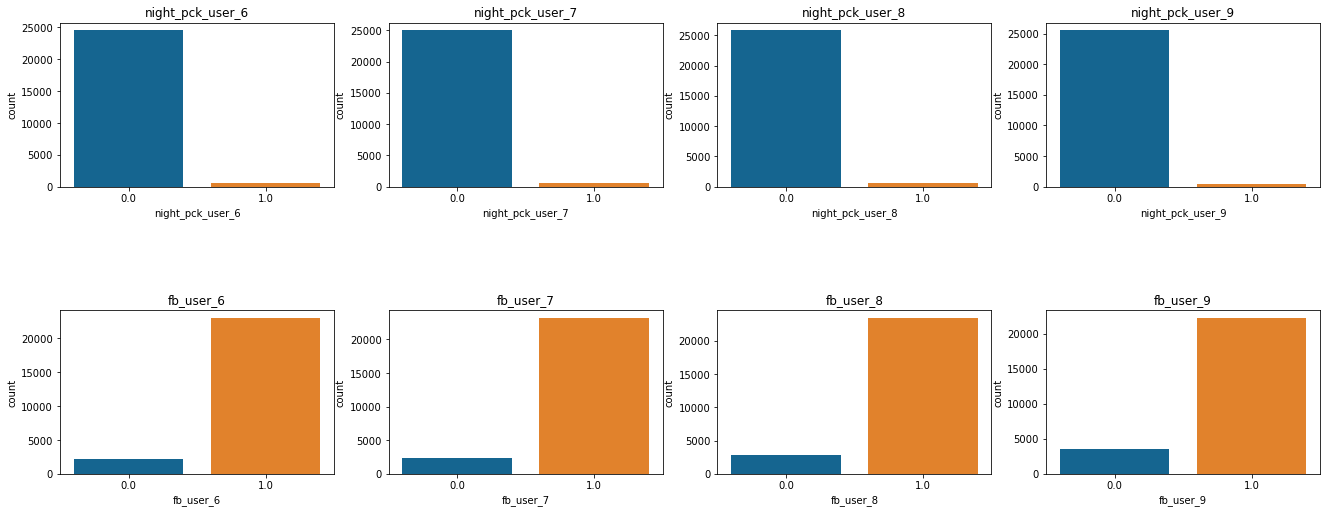

In [27]:
plt.figure(figsize=[20,40])
for i, col in enumerate(cat_col):
    plt.subplot(len(cat_col), 4, i+1)
    plt.subplots_adjust(hspace=.75,right=1 )
    sns.countplot(inp0[col])
    plt.title(col)
plt.show()

In [28]:
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [29]:
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [30]:
# find out the numeric columns
numeric_col=[]
for i,col in enumerate(inp0.columns.to_list()):
    if (col not in date_col):
        if (col not in cat_col):
            numeric_col.append(col)
len(numeric_col)

206

In [31]:
inp0[numeric_col].head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00            

<AxesSubplot:>

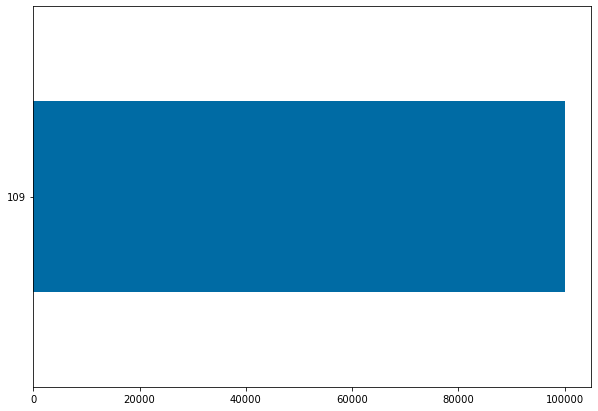

In [32]:
# check if circle id is diffrent
inp0.circle_id.value_counts().plot.barh()

# it is a id column and also the mobile number is a  id column

In [33]:
#lets check if total col are covered or not
len(cat_col)+len(numeric_col)+len(date_col)

226

In [34]:
print(f"category columns are {len(cat_col)}")
print(f"numeric columns are {len(numeric_col)}")
print(f"date columns are {len(date_col)}")


category columns are 8
numeric columns are 206
date columns are 12


# Missing Value Opperation

In [35]:
((inp0.isnull().sum()*100)/inp0.shape[0])

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

# it has been see that there are high volums of data from recharge are nan 

In [36]:
#lets see the recharge vars

import re
rech_col=[]
for i in col_inp0:
    if re.findall("rech", i):
        rech_col.append(i)
rech_col   

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [37]:
rech_col_high_null=[]
for i in rech_col:
    if inp0[i].isna().sum()>0:
        rech_col_high_null.append(i)
rech_col_high_null

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [38]:
len(rech_col_high_null)

28

In [39]:
inp0[rech_col_high_null].isna().sum()

date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
dtype: int64

<AxesSubplot:>

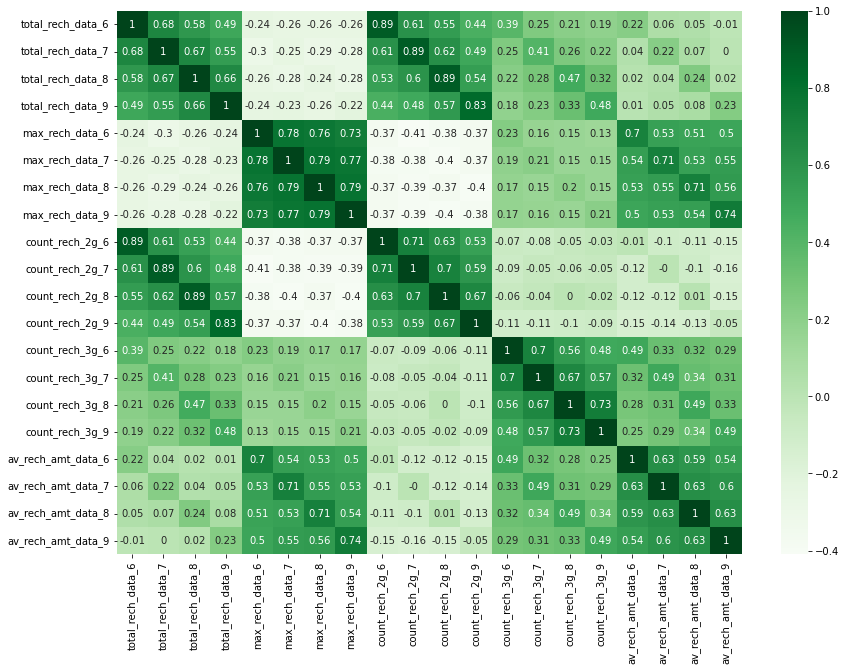

In [40]:
# lets check if there is some corelation in between recharge columns
plt.figure(figsize=[14,10])
sns.heatmap(np.round(inp0[rech_col_high_null].corr(),2), annot=True, fmt=".2g", cmap="Greens")

In [41]:
# lets see if all same month recharge nan values are having same nan with each other
x=inp0[["date_of_last_rech_8", "date_of_last_rech_data_8","av_rech_amt_data_8","max_rech_data_8","count_rech_3g_8"]]
print(f'total null value= {x[x.date_of_last_rech_8.isna()].shape[0]}\n\n')
x[x.date_of_last_rech_8.isna()]

total null value= 3622




date_of_last_rech_8 date_of_last_rech_data_8  av_rech_amt_data_8  \
121                   NaN                      NaN                 NaN   
144                   NaN                      NaN                 NaN   
152                   NaN                      NaN                 NaN   
161                   NaN                      NaN                 NaN   
188                   NaN                      NaN                 NaN   
...                   ...                      ...                 ...   
99877                 NaN                      NaN                 NaN   
99962                 NaN                      NaN                 NaN   
99973                 NaN                      NaN                 NaN   
99996                 NaN                      NaN                 NaN   
99998                 NaN                      NaN                 NaN   

       max_rech_data_8  count_rech_3g_8  
121                NaN              NaN  
144                NaN              NaN  
152                NaN              NaN  
161                NaN              NaN  
188                NaN              NaN  
...                ...              ...  
99877              NaN              NaN  
99962              NaN              NaN  
99973              NaN              NaN  
99996              NaN              NaN  
99998              NaN              NaN  

[3622 rows x 5 columns]

In [42]:
xx=inp0[["date_of_last_rech_7", "date_of_last_rech_data_7","av_rech_amt_data_7","max_rech_data_7","count_rech_3g_7" ]]
print(f'total null value= {xx[xx.date_of_last_rech_7.isna()].shape[0]}\n\n')
xx[xx.date_of_last_rech_7.isna()]

total null value= 1767




date_of_last_rech_7 date_of_last_rech_data_7  av_rech_amt_data_7  \
52                    NaN                      NaN                 NaN   
68                    NaN                      NaN                 NaN   
121                   NaN                      NaN                 NaN   
130                   NaN                      NaN                 NaN   
144                   NaN                      NaN                 NaN   
...                   ...                      ...                 ...   
99851                 NaN                      NaN                 NaN   
99978                 NaN                      NaN                 NaN   
99985                 NaN                      NaN                 NaN   
99993                 NaN                      NaN                 NaN   
99998                 NaN                      NaN                 NaN   

       max_rech_data_7  count_rech_3g_7  
52                 NaN              NaN  
68                 NaN              NaN  
121                NaN              NaN  
130                NaN              NaN  
144                NaN              NaN  
...                ...              ...  
99851              NaN              NaN  
99978              NaN              NaN  
99985              NaN              NaN  
99993              NaN              NaN  
99998              NaN              NaN  

[1767 rows x 5 columns]

In [43]:
xxx=inp0[["date_of_last_rech_9", "date_of_last_rech_data_9","av_rech_amt_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9"]]
print(f'total null value= {xxx[xxx.date_of_last_rech_9.isna()].shape[0]}\n\n')
xxx[xxx.date_of_last_rech_9.isna()]

total null value= 4760




date_of_last_rech_9 date_of_last_rech_data_9  av_rech_amt_data_9  \
11                    NaN                      NaN                 NaN   
51                    NaN                      NaN                 NaN   
67                    NaN                      NaN                 NaN   
72                    NaN                      NaN                 NaN   
144                   NaN                      NaN                 NaN   
...                   ...                      ...                 ...   
99978                 NaN                      NaN                 NaN   
99981                 NaN                      NaN                 NaN   
99983                 NaN                      NaN                 NaN   
99993                 NaN                      NaN                 NaN   
99998                 NaN                      NaN                 NaN   

       max_rech_data_9  count_rech_2g_9  count_rech_3g_9  
11                 NaN              NaN              NaN  
51                 NaN              NaN              NaN  
67                 NaN              NaN              NaN  
72                 NaN              NaN              NaN  
144                NaN              NaN              NaN  
...                ...              ...              ...  
99978              NaN              NaN              NaN  
99981              NaN              NaN              NaN  
99983              NaN              NaN              NaN  
99993              NaN              NaN              NaN  
99998              NaN              NaN              NaN  

[4760 rows x 6 columns]

In [44]:
xxxx=inp0[["date_of_last_rech_6", "date_of_last_rech_data_6","av_rech_amt_data_6","max_rech_data_6","count_rech_3g_6"]]
print(f'total null value= {xxxx[xxxx.date_of_last_rech_6.isna()].shape[0]}\n\n')
xxxx[xxxx.date_of_last_rech_6.isna()]

total null value= 1607




date_of_last_rech_6 date_of_last_rech_data_6  av_rech_amt_data_6  \
26                    NaN                      NaN                 NaN   
91                    NaN                      NaN                 NaN   
187                   NaN                      NaN                 NaN   
198                   NaN                      NaN                 NaN   
232                   NaN                      NaN                 NaN   
...                   ...                      ...                 ...   
99451                 NaN                      NaN                 NaN   
99557                 NaN                      NaN                 NaN   
99680                 NaN                      NaN                 NaN   
99845                 NaN                      NaN                 NaN   
99993                 NaN                      NaN                 NaN   

       max_rech_data_6  count_rech_3g_6  
26                 NaN              NaN  
91                 NaN              NaN  
187                NaN              NaN  
198                NaN              NaN  
232                NaN              NaN  
...                ...              ...  
99451              NaN              NaN  
99557              NaN              NaN  
99680              NaN              NaN  
99845              NaN              NaN  
99993              NaN              NaN  

[1607 rows x 5 columns]

# Analsis says where date_of_last_rech_n is NaN there date_of_last_rech_data_n, av_rech_amt_data_n, max_rech_data_n are, count_rech_3g_n also NaN 

In [45]:
de=inp0[rech_col_high_null].describe(include="all")
de

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
count                98392               98232               96377   
unique                  30                  31                  31   
top              6/30/2014           7/31/2014           8/31/2014   
freq                 16960               17288               14706   
mean                   NaN                 NaN                 NaN   
std                    NaN                 NaN                 NaN   
min                    NaN                 NaN                 NaN   
25%                    NaN                 NaN                 NaN   
50%                    NaN                 NaN                 NaN   
75%                    NaN                 NaN                 NaN   
max                    NaN                 NaN                 NaN   

       date_of_last_rech_9 date_of_last_rech_data_6 date_of_last_rech_data_7  \
count                95239                    25153                    25571   
unique                  30                       30                       31   
top              9/29/2014                6/30/2014                7/31/2014   
freq                 22623                     1888                     1813   
mean                   NaN                      NaN                      NaN   
std                    NaN                      NaN                      NaN   
min                    NaN                      NaN                      NaN   
25%                    NaN                      NaN                      NaN   
50%                    NaN                      NaN                      NaN   
75%                    NaN                      NaN                      NaN   
max                    NaN                      NaN                      NaN   

       date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  \
count                     26339                    25922       25153.000000   
unique                       31                       30                NaN   
top                   8/31/2014                9/29/2014                NaN   
freq                       1998                     2329                NaN   
mean                        NaN                      NaN           2.463802   
std                         NaN                      NaN           2.789128   
min                         NaN                      NaN           1.000000   
25%                         NaN                      NaN           1.000000   
50%                         NaN                      NaN           1.000000   
75%                         NaN                      NaN           3.000000   
max                         NaN                      NaN          61.000000   

        total_rech_data_7  total_rech_data_8  total_rech_data_9  \
count        25571.000000       26339.000000       25922.000000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             2.666419           2.651999           2.441170   
std              3.031593           3.074987           2.516339   
min              1.000000           1.000000           1.000000   
25%              1.000000           1.000000           1.000000   
50%              1.000000           1.000000           2.000000   
75%              3.000000           3.000000           3.000000   
max             54.000000          60.000000          84.000000   

        max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  \
count      25153.000000     25571.000000     26339.000000      25922.00000   
unique              NaN              NaN              NaN              NaN   
top                 NaN              NaN              NaN              NaN   
freq                NaN              NaN              NaN              NaN   
mean         126.393392       126.729459       125.717301    

In [46]:
de.loc[:,"total_rech_data_6": ]

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count        25153.000000       25571.000000       26339.000000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             2.463802           2.666419           2.651999   
std              2.789128           3.031593           3.074987   
min              1.000000           1.000000           1.000000   
25%              1.000000           1.000000           1.000000   
50%              1.000000           1.000000           1.000000   
75%              3.000000           3.000000           3.000000   
max             61.000000          54.000000          60.000000   

        total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count        25922.000000     25153.000000     25571.000000     26339.000000   
unique                NaN              NaN              NaN              NaN   
top                   NaN              NaN              NaN              NaN   
freq                  NaN              NaN              NaN              NaN   
mean             2.441170       126.393392       126.729459       125.717301   
std              2.516339       108.477235       109.765267       109.437851   
min              1.000000         1.000000         1.000000         1.000000   
25%              1.000000        25.000000        25.000000        25.000000   
50%              2.000000       145.000000       145.000000       145.000000   
75%              3.000000       177.000000       177.000000       179.000000   
max             84.000000      1555.000000      1555.000000      1555.000000   

        max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.00000     25153.000000     25571.000000     26339.000000   
unique              NaN              NaN              NaN              NaN   
top                 NaN              NaN              NaN              NaN   
freq                NaN              NaN              NaN              NaN   
mean          124.94144         1.864668         2.044699         2.016288   
std           111.36376         2.570254         2.768332         2.720132   
min             1.00000         0.000000         0.000000         0.000000   
25%            25.00000         1.000000         1.000000         1.000000   
50%           145.00000         1.000000         1.000000         1.000000   
75%           179.00000         2.000000         2.000000         2.000000   
max          1555.00000        42.000000        48.000000        44.000000   

        count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count      25922.000000     25153.000000     25571.000000     26339.000000   
unique              NaN              NaN              NaN              NaN   
top                 NaN              NaN              NaN              NaN   
freq                NaN              NaN              NaN              NaN   
mean           1.781807         0.599133         0.621720         0.635711   
std            2.214701         1.274428         1.394524         1.422827   
min            0.000000         0.000000         0.000000         0.000000   
25%            1.000000         0.000000         0.000000         0.000000   
50%            1.000000         0.000000         0.000000         0.000000   
75%            2.000000         1.000000         1.000000         1.000000   
max           40.000000        29.000000        35.000000        45.000000   

        count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.000000        25153.000000        25571.000000   
unique              NaN                 NaN                 NaN   
top                 NaN                 NaN                 NaN   
freq                NaN                 NaN                 NaN   
mean           0.659363          

# Description Says total_rech_data min and median are 1 so we can impute 0 with nun values for them as the next value is 1

In [47]:
total_reac_data=[]
for i in col_inp0:
    if i.startswith('total_rech_'):
        total_reac_data.append(i)
total_reac_data

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9']

In [48]:
# sklearn 0 imputation
zero_impute=SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0)

In [49]:
for i in total_reac_data:
    inp0[i]=zero_impute.fit_transform(inp0[[i]]).ravel()

In [50]:
# check if all specific col are imputed correctly
inp0[total_reac_data].isna().sum()

total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_num_9     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_amt_9     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
total_rech_data_9    0
dtype: int64

In [51]:
# lets check the decsiption
inp0[total_reac_data].describe()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean           7.558806          7.700367          7.212912          6.893019   
std            7.078405          7.070422          7.203753          7.096261   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000          3.000000          3.000000          3.000000   
50%            6.000000          6.000000          5.000000          5.000000   
75%            9.000000         10.000000          9.000000          9.000000   
max          307.000000        138.000000        196.000000        131.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  
count       99999.000000  
mean            0.632806  
std             1.669040  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max            84.000000

In [52]:
av_reac_amt_data=[]
for i in col_inp0:
    if re.findall('av_', i):
        av_reac_amt_data.append(i)
av_reac_amt_data

['av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [53]:
inp0[av_reac_amt_data].describe([.0020,.015,.05,.1]) # we can impute av_rech_amt_data_n values with 0

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        25153.000000        25571.000000        26339.000000   
mean           192.600982          200.981292          197.526489   
std            192.646318          196.791224          191.301305   
min              1.000000            0.500000            0.500000   
0.2%             5.000000            5.000000            5.000000   
1.5%            14.000000           14.000000           17.000000   
5%              20.800000           23.000000           23.000000   
10%             25.000000           33.000000           25.000000   
50%            154.000000          154.000000          154.000000   
max           7546.000000         4365.000000         4076.000000   

       av_rech_amt_data_9  
count        25922.000000  
mean           192.734315  
std            188.400286  
min              1.000000  
0.2%             8.000000  
1.5%            17.000000  
5%              23.000000  
10%             25.000000  
50%            164.000000  
max           4061.000000

In [54]:
# impute with 0
for i in av_reac_amt_data:
    inp0[i]=zero_impute.fit_transform(inp0[[i]]).ravel()

In [55]:
inp0[av_reac_amt_data].describe()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        99999.000000        99999.000000        99999.000000   
mean            48.445409           51.393440           52.027022   
std            127.743863          132.629365          131.182609   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              8.250000           17.000000           23.000000   
max           7546.000000         4365.000000         4076.000000   

       av_rech_amt_data_9  
count        99999.000000  
mean            49.961089  
std            127.804280  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%             17.000000  
max           4061.000000

In [56]:
#lets see the max_rech_data_n columns
max_rech_data=[]
for i in col_inp0:
    if re.findall('max', i):
        max_rech_data.append(i)
max_rech_data

['max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9']

In [57]:
# lets see the decription
inp0[max_rech_data].describe()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  
count     25153.000000     25571.000000     26339.000000      25922.00000  
mean        126.393392       126.729459       125.717301        124.94144  
std         108.477235       109.765267       109.437851        111.36376  
min           1.000000         1.000000         1.000000          1.00000  
25%          25.000000        25.000000        25.000000         25.00000  
50%         145.000000       145.000000       145.000000        145.00000  
75%         177.000000       177.000000       179.000000        179.00000  
max        1555.000000      1555.000000      1555.000000       1555.00000

# It says max_rech_amt does not have any null but max_rech_data has lets see those cols

In [58]:
max_rech_data_1=[]
for i in col_inp0:
    if re.findall('max_rech_data', i):
        max_rech_data_1.append(i)
max_rech_data_1

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [59]:
inp0[max_rech_data_1].describe([.001,.002,.1,.2])

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count     25153.000000     25571.000000     26339.000000      25922.00000
mean        126.393392       126.729459       125.717301        124.94144
std         108.477235       109.765267       109.437851        111.36376
min           1.000000         1.000000         1.000000          1.00000
0.1%          1.000000         1.000000         1.000000          5.00000
0.2%          5.000000         5.000000         5.000000          5.00000
10%          23.000000        23.000000        23.000000         23.00000
20%          25.000000        25.000000        25.000000         25.00000
50%         145.000000       145.000000       145.000000        145.00000
max        1555.000000      1555.000000      1555.000000       1555.00000

In [60]:
# lts impte these with 0

for i in max_rech_data_1:
    inp0[i]=zero_impute.fit_transform(inp0[[i]]).ravel()

In [61]:
inp0[max_rech_data_1].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count     99999.000000     99999.000000     99999.000000     99999.000000
mean         31.792048        32.406314        33.113011        32.387644
std          77.248778        78.342435        78.872739        78.818696
min           0.000000         0.000000         0.000000         0.000000
25%           0.000000         0.000000         0.000000         0.000000
50%           0.000000         0.000000         0.000000         0.000000
75%           8.000000        14.000000        17.000000        17.000000
max        1555.000000      1555.000000      1555.000000      1555.000000

In [62]:
# lets check if all the imputation are coreect
check1=total_reac_data+av_reac_amt_data+max_rech_data

inp0[check1].isna().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [63]:
#lets check the date_col
inp0[date_col]

# there are so many days and those should not have any relevance to modeling drop them

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0                9/30/2014           6/21/2014           7/16/2014   
1                9/30/2014           6/29/2014           7/31/2014   
2                9/30/2014           6/17/2014           7/24/2014   
3                9/30/2014           6/28/2014           7/31/2014   
4                9/30/2014           6/26/2014           7/28/2014   
...                    ...                 ...                 ...   
99994            9/30/2014            6/3/2014           7/20/2014   
99995            9/30/2014           6/17/2014           7/17/2014   
99996            9/30/2014           6/13/2014           7/26/2014   
99997            9/30/2014           6/17/2014           7/19/2014   
99998            9/30/2014           6/16/2014                 NaN   

      date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0                8/8/2014           9/28/2014                6/21/2014   
1               8/28/2014           9/30/2014                      NaN   
2               8/14/2014           9/29/2014                      NaN   
3               8/31/2014           9/30/2014                      NaN   
4                8/9/2014           9/28/2014                 6/4/2014   
...                   ...                 ...                      ...   
99994           8/26/2014           9/25/2014                      NaN   
99995           8/24/2014           9/26/2014                      NaN   
99996                 NaN            9/2/2014                6/13/2014   
99997           8/20/2014           9/17/2014                6/17/2014   
99998                 NaN                 NaN                6/11/2014   

      date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                    7/16/2014                 8/8/2014   
1                    7/25/2014                8/10/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                      NaN                      NaN   
99997                7/19/2014                8/20/2014   
99998                      NaN                      NaN   

      date_of_last_rech_data_9  
0                          NaN  
1                          NaN  
2                    9/17/2014  
3                          NaN  
4                          NaN  
...                        ...  
99994                      NaN  
99995                      NaN  
99996                      NaN  
99997                9/17/2014  
99998                      NaN  

[99999 rows x 12 columns]

In [64]:
#lets delet not irrlavent col those are id, circle_id and date cols
inp0.drop(date_col, 1, inplace=True)
inp0.drop(["mobile_number", "circle_id"],1,inplace=True)
print(f"Col dropped {telecom.shape[1]- inp0.shape[1]}")

Col dropped 14


In [65]:
# also delet from numeric list and add in id list
id_col=["mobile_number", "circle_id"]
del numeric_col[0]
del numeric_col[1]

In [66]:
#check the new shape
inp0.shape

(99999, 212)

In [67]:
# check the cat_col
cat_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [68]:
inp0[cat_col].describe(include="all")

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      25153.000000      25571.000000      26339.000000      25922.000000   
mean           0.025086          0.023034          0.020844          0.015971   
std            0.156391          0.150014          0.142863          0.125366   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          fb_user_6     fb_user_7     fb_user_8     fb_user_9  
count  25153.000000  25571.000000  26339.000000  25922.000000  
mean       0.914404      0.908764      0.890808      0.860968  
std        0.279772      0.287950      0.311885      0.345987  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [69]:
inp0[cat_col].isna().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [70]:
# as there are many null values we will not drop them and before we saw it has 2 values 1 and 0 so 
#lets creat another feature here -1
inp0[cat_col]=inp0[cat_col].apply(lambda x: x.fillna(-1))
inp0[cat_col].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [71]:
inp0[cat_col].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          -0.742157         -0.738397         -0.731117         -0.736637   
std            0.451644          0.452713          0.455595          0.449761   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -1.000000         -1.000000         -1.000000         -1.000000   
50%           -1.000000         -1.000000         -1.000000         -1.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          fb_user_6     fb_user_7     fb_user_8     fb_user_9  
count  99999.000000  99999.000000  99999.000000  99999.000000  
mean      -0.518465     -0.511905     -0.501975     -0.517595  
std        0.842420      0.845358      0.848097      0.834303  
min       -1.000000     -1.000000     -1.000000     -1.000000  
25%       -1.000000     -1.000000     -1.000000     -1.000000  
50%       -1.000000     -1.000000     -1.000000     -1.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

In [72]:
#lets check again the null vales with latest imputaion
check2=check1+cat_col
inp0[check2].isna().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
night_pck_user_6      0
night_pck_user_7      0
night_pck_user_8      0
night_pck_user_9      0
fb_user_6             0
fb_user_7             0
fb_user_8             0
fb_user_9             0
dtype: int64

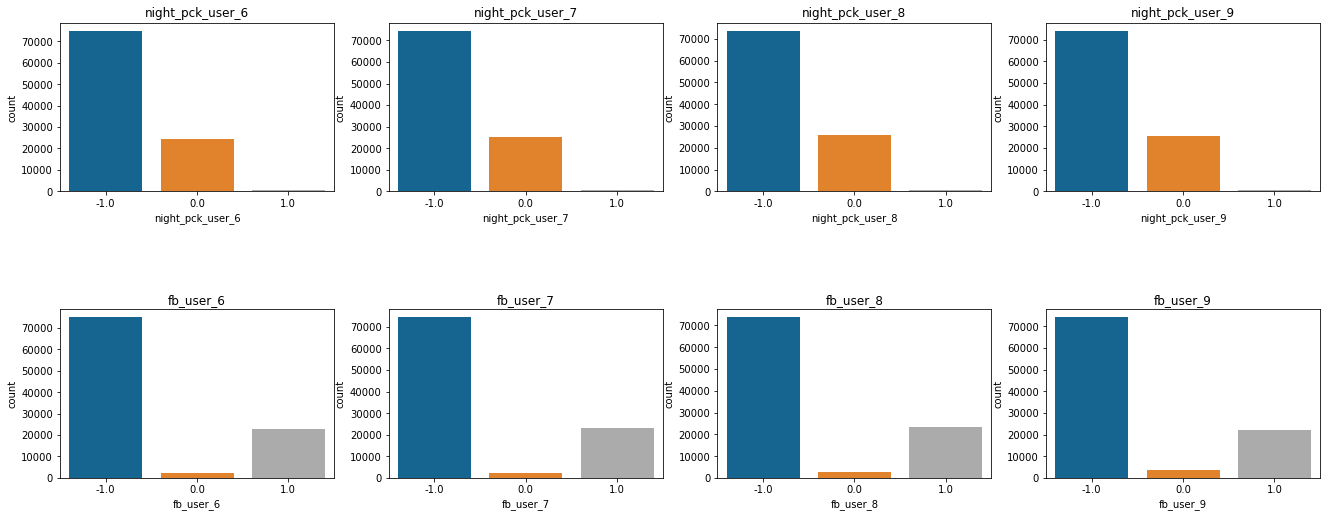

In [73]:
#ploting catcol 
plt.figure(figsize=[20,40])
for i, col in enumerate(cat_col):
    plt.subplot(len(cat_col), 4, i+1)
    plt.subplots_adjust(hspace=.7,right=1 )
    sns.countplot(inp0[col])
    plt.title(col)
plt.show()

In [74]:
# check other var missing values
100*inp0.isna().sum()/inp0.shape[0]

# still there are very high number of data which are msiising

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [75]:
thersold_x=0.7
act_col=[]

for i in inp0.columns:
    if inp0[i].isna().sum()/inp0.shape[0]<.7:
        act_col.append(i)
act_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [76]:
inp0=inp0[act_col]
inp0.shape

(99999, 196)

In [77]:
print(f"Total Dropped coloumns are {telecom.shape[1]-inp0.shape[1]} from the original data")
print(f"Total Dropped rows are {telecom.shape[0]-inp0.shape[0]} from the original data")

Total Dropped coloumns are 30 from the original data
Total Dropped rows are 0 from the original data


In [78]:
100*inp0.isna().sum()/inp0.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

In [79]:
#lets impute all the values with median values
median_impute= SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [80]:
#create a imputer
median_imputed_col=inp0.columns.to_list()

In [81]:
#use a loop to convert all the imputation
for i in median_imputed_col:
    inp0[i]=median_impute.fit_transform(inp0[[i]]).ravel()

In [82]:
inp0.isna().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

# All null values are taken care off

# Filter High Value Customers

We need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

1st 2 months means 6 & 7

### Good Phase
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

### Action Phase
The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

### Churn Phase
The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [83]:
# calculate the total data recharge amount for 6,7 months number of recharges * average recharge amount
inp0['total_data_rech_6'] = inp0.total_rech_data_6 * inp0.av_rech_amt_data_6
inp0['total_data_rech_7'] = inp0.total_rech_data_7 * inp0.av_rech_amt_data_7

In [84]:
inp0.loc[:, "total_data_rech_6":].head()

total_data_rech_6  total_data_rech_7
0              252.0              252.0
1                0.0              154.0
2                0.0                0.0
3                0.0                0.0
4               56.0                0.0

In [85]:
inp0.loc[:, "total_data_rech_6":].describe()

total_data_rech_6  total_data_rech_7
count       99999.000000       99999.000000
mean          148.883796         171.294755
std           804.258761         843.284525
min             0.000000           0.000000
25%             0.000000           0.000000
50%             0.000000           0.000000
75%            13.000000          17.000000
max        105644.000000       55080.000000

In [86]:
for i in inp0.columns.to_list():
    if re.findall("total_rech_amt", i):
        print(i)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9


In [87]:
# Now add normal reacharge and total data rech to get total recharge for 6, 7 months

inp0["total_combined_rech_6"]=inp0.total_data_rech_6+inp0.total_rech_amt_6
inp0["total_combined_rech_7"]=inp0.total_data_rech_7+inp0.total_rech_amt_7

In [88]:
# calculate average recharge done by customer in 6 and 7
inp0['av_amt_data_6_7'] = (inp0.total_combined_rech_6 + inp0.total_combined_rech_7)/2

In [89]:
inp0.loc[:, "total_data_rech_6":].head()

total_data_rech_6  total_data_rech_7  total_combined_rech_6  \
0              252.0              252.0                  614.0   
1                0.0              154.0                   74.0   
2                0.0                0.0                  168.0   
3                0.0                0.0                  230.0   
4               56.0                0.0                  252.0   

   total_combined_rech_7  av_amt_data_6_7  
0                  504.0            559.0  
1                  538.0            306.0  
2                  315.0            241.5  
3                  310.0            270.0  
4                  350.0            301.0

In [90]:
## look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(inp0.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

In [91]:
#take out ustomer who have recharged 70 quantile or more
churn=inp0[inp0["av_amt_data_6_7"]>=inp0.av_amt_data_6_7.quantile(.7)]

In [92]:
churn.shape

(30001, 201)

In [93]:
#lets delet 'total_data_rech_6', 'total_data_rech_7', 'total_combined_rech_6', 'total_combined_rech_7', 'av_amt_data_6_7
churn.drop(['total_data_rech_6', 'total_data_rech_7', 'total_combined_rech_6', 'total_combined_rech_7', 'av_amt_data_6_7'],1, inplace=True)
churn.shape
                                      

(30001, 196)

In [94]:
print(f"Total Dropped coloumns are {telecom.shape[1]-churn.shape[1]},saved data = {np.round(100*churn.shape[1]/telecom.shape[1],2)}%")
print(f"Total Dropped rows are {telecom.shape[0]-churn.shape[0]},saved data = {np.round(100*churn.shape[0]/telecom.shape[0],2)}%" )

Total Dropped coloumns are 30,saved data = 86.73%
Total Dropped rows are 69998,saved data = 30.0%


# Now we do have 30%(30001) rows and 88%(196) columns with High Value customers do Recharge more than or equal to 70 quantile

# What is Churn:

#### Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

#### Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In [95]:
print(churn.columns.to_list())

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', '

In [96]:
#calculate total incoming and out going call of 9th month
# first find out if total usage is given or not for the month
ic_9=[]
for i in churn.columns.to_list():
    if re.findall("ic", i):
        if re.findall("9", i):
            ic_9.append(i)
ic_9            
        
        
# total incoming call have been givve in the name of  "total_ic_9"

['roam_ic_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9']

In [97]:
og_9=[]
for i in churn.columns.to_list():
    if re.findall("og", i):
        if re.findall("9", i):
            og_9.append(i)
og_9
# total monthly outgoin also given in the name of "total_og_9"

['roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9']

In [98]:
#calculate total incoming and out going call of 9th month (total_call_mou_9+total_og_mou_9)
churn["total_call_mou_9"]=churn["total_ic_mou_9"]+churn["total_og_mou_9"]

In [99]:
#lets calculate total internet usage of month 9
internet_9=[]
for i in churn.columns.to_list():
    if re.findall("2g", i) or re.findall("3g", i):
        if re.findall("9", i):
            internet_9.append(i)
internet_9
    

['vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [100]:
# it seems 2G and 3G volums enough to say usage of internet 
#lets calculate total usage of mb in the month of 9th 

churn["total_internet_mb_usage_9"]= churn.vol_2g_mb_9 + churn.vol_3g_mb_9
churn.iloc[:5, 196:]
#letsss eck the data

total_call_mou_9  total_internet_mb_usage_9
0               0.00                       0.00
7               0.00                       0.00
8             177.09                       0.00
21           1284.14                       0.00
23            255.11                     328.67

# now churn will be those people who has no activity in calls or internet usage in the month of 9
# let's define Churn

In [101]:
churn["churn_flag"]=churn.apply(lambda x: 1 if (x["total_call_mou_9"]==0 and x["total_internet_mb_usage_9"]==0) else 0, axis=1)

0    0.918636
1    0.081364
Name: churn_flag, dtype: float64


<AxesSubplot:>

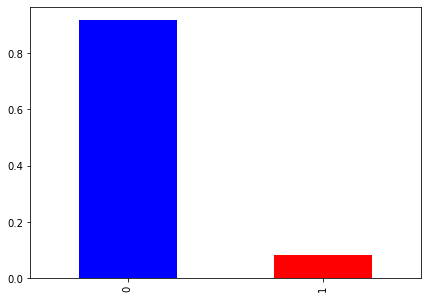

In [102]:
plt.figure(figsize=[7,5])
print(churn["churn_flag"].value_counts(normalize=True))
churn["churn_flag"].value_counts(normalize=True).plot.bar(color=['b',"r"])

# now churn_flag is the target variable
# it has data imbalance(91% vs 8%)

In [103]:
#lets make the churn_flag as categorical column

churn["churn_flag"]=churn["churn_flag"].astype('str')
# lets check if the col beame cat col

churn["churn_flag"].apply(type).value_counts()

<class 'str'>    30001
Name: churn_flag, dtype: int64

# Calculate difference between (8th - 6th+7th) 
## depending on the usage and recharge values we are creating new features

These new features should have good predictive power as these are realted to good phase action phase and bad phase, significance change from 8th month to average of (6th and 7th) month can indicate reason of churn

In [104]:
#Average revenue per user
churn['arpu_diff'] = churn.arpu_8 - ((churn.arpu_6 + churn.arpu_7)/2)
churn['arpu_diff']

0           7.7025
7        1961.9650
8        -298.1100
21         81.6570
23        232.8425
           ...    
99981      73.6135
99984    -147.0730
99986      14.2335
99988     -10.6650
99997     293.6285
Name: arpu_diff, Length: 30001, dtype: float64

In [105]:
#All kind of calls within the same operator network

churn['onnet_mou_diff'] = churn.onnet_mou_8 - ((churn.onnet_mou_6 + churn.onnet_mou_7)/2)
churn['onnet_mou_diff']

0          0.000
7         -3.970
8       -347.280
21       -32.120
23       -16.230
          ...   
99981     49.380
99984   -297.200
99986     97.365
99988   -184.715
99997      0.000
Name: onnet_mou_diff, Length: 30001, dtype: float64

In [106]:
#All kind of calls outside the operator T network

churn['offnet_mou_diff'] = churn.offnet_mou_8 - ((churn.offnet_mou_6 + churn.offnet_mou_7)/2)

In [107]:
#roaming incoming
churn['roam_ic_mou_diff'] = churn.roam_ic_mou_8 - ((churn.roam_ic_mou_6 + churn.roam_ic_mou_7)/2)

In [108]:
#romaing outgoing
churn['roam_og_mou_diff'] = churn.roam_og_mou_8 - ((churn.roam_og_mou_6 + churn.roam_og_mou_7)/2)

In [109]:
#local call outgoing
churn['loc_og_mou_diff'] = churn.loc_og_mou_8 - ((churn.loc_og_mou_6 + churn.loc_og_mou_7)/2)

In [110]:
#std outgoing
churn['std_og_mou_diff'] = churn.std_og_mou_8 - ((churn.std_og_mou_6 + churn.std_og_mou_7)/2)

In [111]:
#isd outgoing
churn['isd_og_mou_diff'] = churn.isd_og_mou_8 - ((churn.isd_og_mou_6 + churn.isd_og_mou_7)/2)

In [112]:
#special out going
churn['spl_og_mou_diff'] = churn.spl_og_mou_8 - ((churn.spl_og_mou_6 + churn.spl_og_mou_7)/2)

In [113]:
#total outoing
churn['total_og_mou_diff'] = churn.total_og_mou_8 - ((churn.total_og_mou_6 + churn.total_og_mou_7)/2)

In [114]:
#local incoming
churn['loc_ic_mou_diff'] = churn.loc_ic_mou_8 - ((churn.loc_ic_mou_6 + churn.loc_ic_mou_7)/2)

In [115]:
#std incoming
churn['std_ic_mou_diff'] = churn.std_ic_mou_8 - ((churn.std_ic_mou_6 + churn.std_ic_mou_7)/2)

In [116]:
#isd incoming
churn['isd_ic_mou_diff'] = churn.isd_ic_mou_8 - ((churn.isd_ic_mou_6 + churn.isd_ic_mou_7)/2)

In [117]:
#special incoming
churn['spl_ic_mou_diff'] = churn.spl_ic_mou_8 - ((churn.spl_ic_mou_6 + churn.spl_ic_mou_7)/2)

In [118]:
#total incoming
churn['total_ic_mou_diff'] = churn.total_ic_mou_8 - ((churn.total_ic_mou_6 + churn.total_ic_mou_7)/2)

In [119]:
#total recharge number
churn['total_rech_num_diff'] = churn.total_rech_num_8 - ((churn.total_rech_num_6 + churn.total_rech_num_7)/2)

In [120]:
# total recharge amnt
churn['total_rech_amt_diff'] = churn.total_rech_amt_8 - ((churn.total_rech_amt_6 + churn.total_rech_amt_7)/2)

In [121]:
#max recharge amount
churn['max_rech_amt_diff'] = churn.max_rech_amt_8 - ((churn.max_rech_amt_6 + churn.max_rech_amt_7)/2)

In [122]:
# total data recharge
churn['total_rech_data_diff'] = churn.total_rech_data_8 - ((churn.total_rech_data_6 + churn.total_rech_data_7)/2)

In [123]:
#max data recharge
churn['max_rech_data_diff'] = churn.max_rech_data_8 - ((churn.max_rech_data_6 + churn.max_rech_data_7)/2)

In [124]:
#ave rech amount
churn['av_rech_amt_data_diff'] = churn.av_rech_amt_data_8 - ((churn.av_rech_amt_data_6 + churn.av_rech_amt_data_7)/2)

In [125]:
#2g internet voulume
churn['vol_2g_mb_diff'] = churn.vol_2g_mb_8 - ((churn.vol_2g_mb_6 + churn.vol_2g_mb_7)/2)

In [126]:
#3g internet volums
churn['vol_3g_mb_diff'] = churn.vol_3g_mb_8 - ((churn.vol_3g_mb_6 + churn.vol_3g_mb_7)/2)
churn['vol_3g_mb_diff']

0          -7.555
7           0.000
8        -363.535
21          0.000
23        710.375
           ...   
99981     367.885
99984       0.000
99986      -5.895
99988     671.960
99997    1265.445
Name: vol_3g_mb_diff, Length: 30001, dtype: float64

In [127]:
churn.shape

(30001, 222)

In [128]:
#lets check the decription for the newly created cols
churn.loc[:,"arpu_diff":].describe(include='all')

arpu_diff  onnet_mou_diff  offnet_mou_diff  roam_ic_mou_diff  \
count  30001.000000    30001.000000     30001.000000      30001.000000   
mean     -51.038557      -30.193620       -40.821520         -1.875878   
std      334.872321      308.732579       349.434892         65.972062   
min    -5811.052500    -5295.315000     -7094.390000      -1296.985000   
25%     -180.179500      -52.345000      -100.900000          0.000000   
50%      -40.754500       -3.210000       -11.025000          0.000000   
75%       83.239000       18.410000        41.040000          0.000000   
max    12808.617000     6359.920000     12604.240000       2330.200000   

       roam_og_mou_diff  loc_og_mou_diff  std_og_mou_diff  isd_og_mou_diff  \
count      30001.000000     30001.000000     30001.000000     30001.000000   
mean          -3.496201       -18.870166       -48.175917        -0.189665   
std           94.165541       213.766985       427.952693        14.001271   
min        -2410.835000     -3867.830000     -7127.425000      -619.650000   
25%            0.000000       -58.880000       -54.595000         0.000000   
50%            0.000000        -4.955000        -0.405000         0.000000   
75%            0.000000        30.125000         8.105000         0.000000   
max         3057.150000      4619.975000     12715.480000       544.780000   

       spl_og_mou_diff  total_og_mou_diff  loc_ic_mou_diff  std_ic_mou_diff  \
count     30001.000000       30001.000000     30001.000000     30001.000000   
mean          0.093746         -67.437337        -9.465915        -3.516120   
std          18.088160         502.630069       180.801296        98.256037   
min       -1081.910000       -7213.410000     -3841.055000     -2777.350000   
25%          -2.750000        -168.025000       -49.805000       -11.905000   
50%           0.000000         -14.625000        -3.940000        -0.640000   
75%           1.310000          67.915000        34.405000         4.995000   
max         747.620000       12768.705000      3485.370000      3321.395000   

       isd_ic_mou_diff  spl_ic_mou_diff  total_ic_mou_diff  \
count     30001.000000     30001.000000       30001.000000   
mean         -0.331985        -0.013833         -13.430810   
std          56.736330         0.174520         221.899902   
min       -5534.595000       -16.280000       -5710.150000   
25%           0.000000         0.000000         -67.230000   
50%           0.000000         0.000000          -5.610000   
75%           0.000000         0.000000          44.280000   
max        3163.690000         4.450000        3485.370000   

       total_rech_num_diff  total_rech_amt_diff  max_rech_amt_diff  \
count         30001.000000         30001.000000       30001.000000   
mean             -1.812056           -76.249725         -10.598813   
std               6.755899           418.479122         136.893018   
min            -147.500000         -6950.000000       -3010.000000   
25%              -4.000000          -245.000000         -33.000000   
50%              -1.500000           -57.500000           0.000000   
75%               1.000000            99.500000          25.000000   
max             130.500000         14344.500000        3949.000000   

       total_rech_data_diff  max_rech_data_diff  av_rech_amt_data_diff  \
count          30001.000000        30001.000000           30001.000000   
mean              -0.138845           -6.467768             -13.085795   
std                2.214561           78.343307             148.249896   
min              -30.500000        -1303.000000           -3486.500000   
25%               -0.500000           -7.000000             -59.000000   
50%                0.000000            0.000000               0.000000   
75%                0.000000            0.000000               9.500000   
max               52.500000         1352.000000            1805.000000   

       vol_2g_mb_diff  vol_3g_mb_diff  
count    30001.000000    30001.

In [129]:
# take out all the features are having 9month relation
churn_filter=churn.filter(regex='[^9]$', axis=1)
churn_filter.shape

(30001, 173)

In [130]:
check_5=[]
for i in churn_filter.columns.to_list():
    if re.findall('9', i):
        check_5.append(i)
check_5

[]

# Visualization

In [131]:
col_list=churn_filter.columns.to_list()
len(col_list)
del col_list[149] #delet chrun_flag from list

# Univariate 

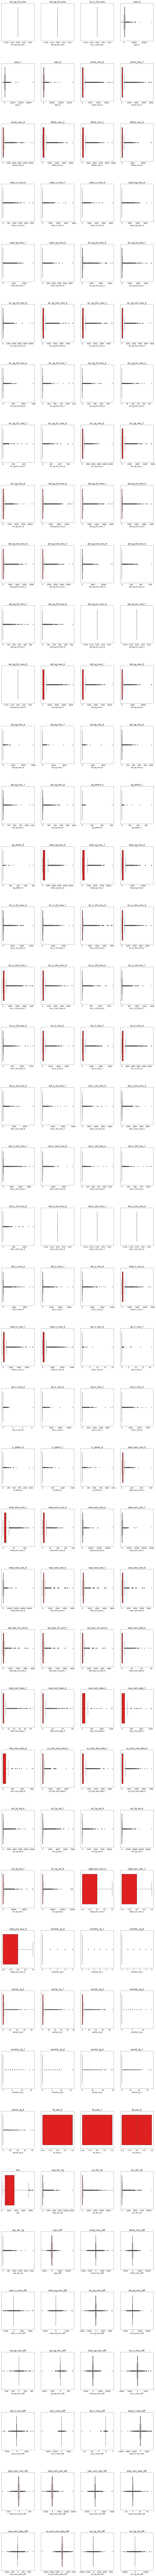

In [132]:
plt.figure(figsize=[20,400])
plt.rc('font', size=14)

for i, col in enumerate(col_list):
    plt.subplot(44,4,i+1)
    sns.boxplot(churn_filter[col], color="r")
    plt.subplots_adjust(hspace=.60,right=1 )
    plt.title(col)
plt.show()

# it seems there are lts of data are having outliers

# Bivariate Analysis

In [133]:
plt.figure(figsize=[20,600])
plt.rc('font', size=14)

for i, col in enumerate(col_list):
    plt.subplot(88,2,i+1)
    sns.boxplot(y= churn_filter[col],x= "churn_flag", hue='churn_flag', data= churn_filter)
    plt.subplots_adjust(hspace=.60,right=1 )
    plt.title(col)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='night_pck_user_6', ylabel='count'>

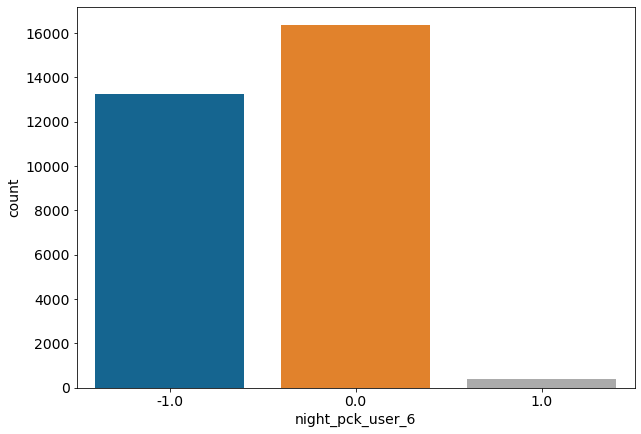

In [134]:
#checking won created element -1 once again
sns.countplot(churn_filter["night_pck_user_6"])

<AxesSubplot:>

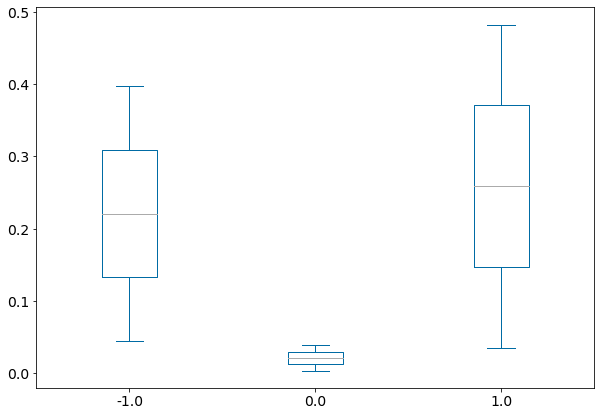

In [135]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["fb_user_6"], normalize=True)).plot.box()

<AxesSubplot:>

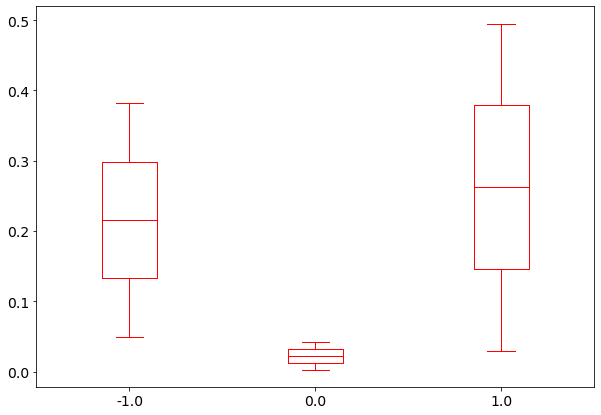

In [136]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["fb_user_7"], normalize=True)).plot.box(color='r')

<AxesSubplot:>

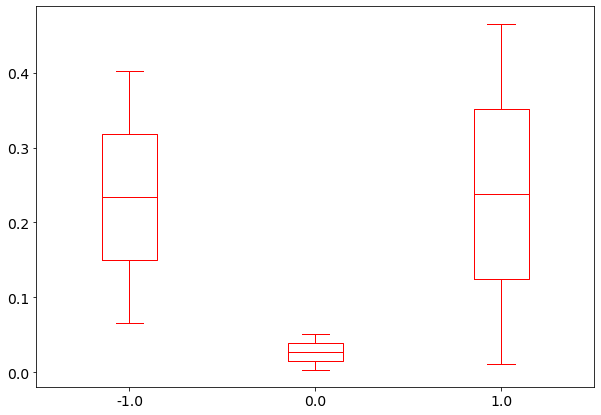

In [137]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["fb_user_8"], normalize=True)).plot.box(color='r')

<AxesSubplot:>

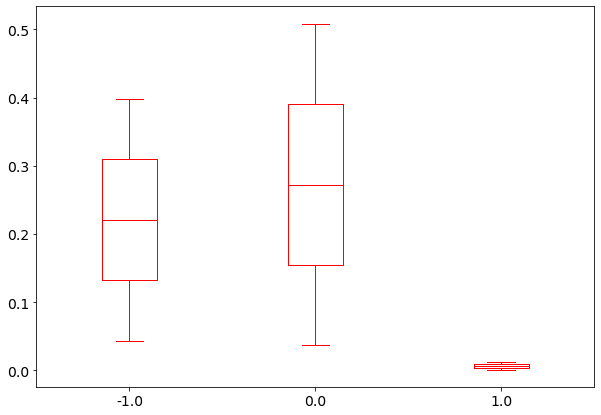

In [138]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["night_pck_user_6"], normalize=True)).plot.box(color='r')

<AxesSubplot:>

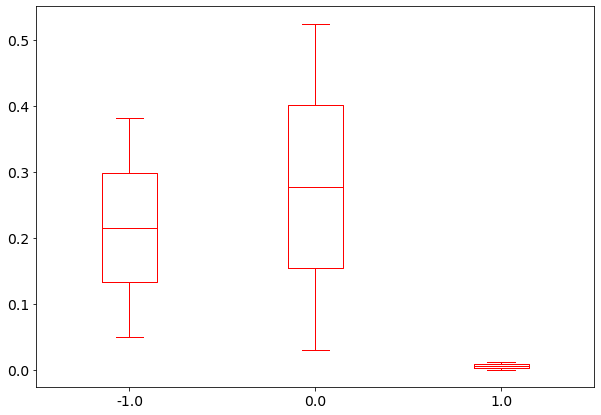

In [139]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["night_pck_user_7"], normalize=True)).plot.box(color='r')

<AxesSubplot:>

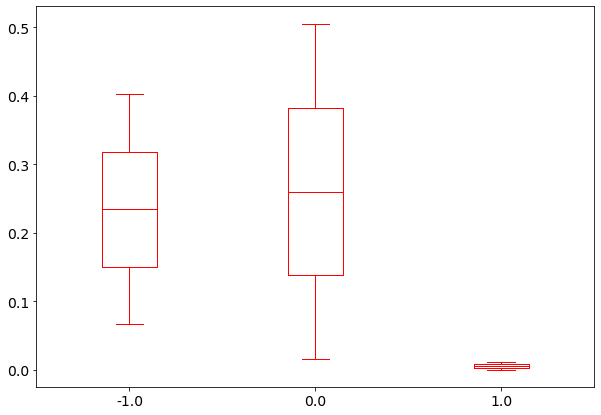

In [140]:
(pd.crosstab(churn_filter["churn_flag"], churn_filter["night_pck_user_8"], normalize=True)).plot.box(color='r')

# it seems nightpack user are having less indication to churn and fb user are more in churn

In [141]:
(pd.crosstab(churn_filter["churn_flag"],churn_filter.sachet_3g_6, normalize=True))

sachet_3g_6        0         1         2       3         4         5   \
churn_flag                                                              
0            0.819673  0.067298  0.015733  0.0058  0.002933  0.001800   
1            0.072564  0.005500  0.001167  0.0006  0.000467  0.000267   

sachet_3g_6        6         7         8         9         10        11  \
churn_flag                                                                
0            0.001167  0.001233  0.000633  0.000633  0.000267  0.000333   
1            0.000200  0.000233  0.000033  0.000133  0.000133  0.000000   

sachet_3g_6        12      13        14        15        16        17      18  \
churn_flag                                                                      
0            0.000133  0.0001  0.000133  0.000167  0.000067  0.000033  0.0001   
1            0.000000  0.0000  0.000000  0.000000  0.000000  0.000000  0.0000   

sachet_3g_6        19        21      22        23        28        29  
churn_flag                                                             
0            0.000100  0.000033  0.0001  0.000067  0.000033  0.000067  
1            0.000033  0.000000  0.0000  0.000033  0.000000  0.000000

#  As there are so Many outliers lets cap with 3*std techinque

In [142]:
# create the function
def cap_outliers_func(df, thr=3): #keeping 3*std as outliers
    upper_limt=df.mean()+df.std()*thr
    lower_limit=df.mean()-df.std()*thr
    df[df>upper_limt]=upper_limt
    df[df<lower_limit]=lower_limit
    return df

#  lets check the function

In [143]:
ar=np.array(list(range(200,700,30)))
ar[2]=-100000
ar[-1]=100000
print(ar)
print(f'mean of array= {ar.mean()}')


[    200     230 -100000     290     320     350     380     410     440
     470     500     530     560     590     620     650  100000]
mean of array= 384.70588235294116


In [144]:
cap_outliers_func(ar, thr=2) # checked with theresod=2
# it seems the function is working

array([   200,    230, -68215,    290,    320,    350,    380,    410,
          440,    470,    500,    530,    560,    590,    620,    650,
        68985])

In [145]:
# cap outliers in the numeric columns
# first take outh the numeric columns
num_col_1=churn_filter.loc[:, churn_filter.dtypes!="object"].columns.to_list()

In [146]:
num_col_1

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [147]:
# 'night_pck_user_6',
#  'night_pck_user_7',
#  'night_pck_user_8',
#  'fb_user_6',
#  'fb_user_7',
#  'fb_user_8',
#  'churn',
# these cols are actualy obeject col so lets remove them from the 

extract_out=['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']
num_col_2=[]
for i in num_col_1:
    if i not in extract_out:
        num_col_2.append(i)
        

In [148]:
#lets check if code ran perfect
len(num_col_2), len(num_col_1)

(166, 172)

In [149]:
churn_filter[num_col_2]=churn_filter[num_col_2].apply(cap_outliers_func, axis=0)

<AxesSubplot:xlabel='vol_3g_mb_diff'>

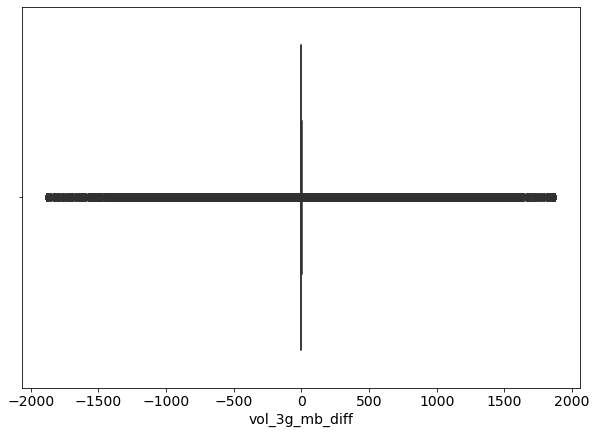

In [150]:
# lets check if the function worked on df correctly
sns.boxplot(churn_filter["vol_3g_mb_diff"])

# It seems all nul values are taken care and also outliers are maked with 3*std with mean

# Lets starts with model Building

# Steps:
## i) Preprocessing
#### a> Train_test_split
#### b> Feature Engineering


# i) Preprocessing

In [151]:
#convert the churn_flag to numeric value
inp1=churn_filter.copy()
inp1["churn_flag"]=inp1["churn_flag"].apply(lambda x: int(x))

In [152]:
inp1[['churn_flag']].info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   churn_flag  30001 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [153]:
inp1=inp1.reset_index(drop=True)

In [154]:
# train_test_split

x=inp1.drop("churn_flag",1)
y=inp1[["churn_flag"]]

In [155]:
x.shape, y.shape

((30001, 172), (30001, 1))

In [156]:
x.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803000         0.00         0.00         0.00          0.00   
1  2014.483901        57.84        54.68        52.29        453.43   
2   137.362000       413.69       351.03        35.08         94.66   
3   637.760000       102.41       132.11        85.14        757.93   
4   366.966000        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        567.16        325.91          16.23          33.49          31.64   
2         80.63        136.48           0.00           0.00           0.00   
3        896.68        983.39           0.00           0.00           0.00   
4         89.36        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00          0.00   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
1        533.91        255.79              4.30             23.29   
2        288.18         63.04            116.56            133.43   
3         94.09        129.74             97.93            125.94   
4        133.68        182.14              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             12.01             49.89             31.76             49.14   
2             22.58             13.69             10.04             75.69   
3             61.79            665.36            808.74            876.99   
4              0.00              2.36              6.35             39.61   

   std_og_t2f_mo

In [157]:
# as the data has huge imbalance make y as startify
x_train, X_test, y_train, Y_test = train_test_split(x,y, random_state=45, train_size=.75, stratify=y)
x_train.shape, y_train.shape, X_test.shape, Y_test.shape

((22500, 172), (22500, 1), (7501, 172), (7501, 1))

In [158]:
# lets check if data has been distributed uniformly
y_train.value_counts(normalize=True)

churn_flag
0             0.918622
1             0.081378
dtype: float64

In [159]:
Y_test.value_counts(normalize=True)

churn_flag
0             0.918678
1             0.081322
dtype: float64

# featrue enginearing for train cat cols



In [160]:
#concat the x and y train
train_set= pd.concat([x_train, y_train], axis=1)
train_set.iloc[:,-1].head()

16702    0
6059     0
21338    0
29003    1
2668     0
Name: churn_flag, dtype: int64

In [161]:
#check which method we can use by seeing unique data in each col

len(inp1["churn_flag"].unique())

2

In [162]:
for col in inp1.columns:
    unique_elements= len(inp1[col].unique())
    print(f"{col} has '{unique_elements}' numbers of unique values")
    print()
    print("_*_")

loc_og_t2o_mou has '1' numbers of unique values

_*_
std_og_t2o_mou has '1' numbers of unique values

_*_
loc_ic_t2o_mou has '1' numbers of unique values

_*_
arpu_6 has '28746' numbers of unique values

_*_
arpu_7 has '28784' numbers of unique values

_*_
arpu_8 has '27788' numbers of unique values

_*_
onnet_mou_6 has '16267' numbers of unique values

_*_
onnet_mou_7 has '16339' numbers of unique values

_*_
onnet_mou_8 has '15235' numbers of unique values

_*_
offnet_mou_6 has '20608' numbers of unique values

_*_
offnet_mou_7 has '20699' numbers of unique values

_*_
offnet_mou_8 has '19614' numbers of unique values

_*_
roam_ic_mou_6 has '3559' numbers of unique values

_*_
roam_ic_mou_7 has '3008' numbers of unique values

_*_
roam_ic_mou_8 has '3051' numbers of unique values

_*_
roam_og_mou_6 has '4203' numbers of unique values

_*_
roam_og_mou_7 has '3494' numbers of unique values

_*_
roam_og_mou_8 has '3588' numbers of unique values

_*_
loc_og_t2t_mou_6 has '9971' numbers o

# Mean Encoding for few cols which are actualy cat col

In [163]:
train_set["night_pck_user_6"].value_counts() # check value before

 0.0    12315
-1.0     9879
 1.0      306
Name: night_pck_user_6, dtype: int64

In [164]:
#GET THE VALUES
train_set.groupby(["night_pck_user_6"])['churn_flag'].mean()



night_pck_user_6
-1.0    0.098795
 0.0    0.067073
 1.0    0.094771
Name: churn_flag, dtype: float64

In [165]:
train_set.groupby(["night_pck_user_7"])['churn_flag'].mean()

night_pck_user_7
-1.0    0.114758
 0.0    0.056174
 1.0    0.066667
Name: churn_flag, dtype: float64

In [166]:
train_set.groupby(["night_pck_user_8"])['churn_flag'].mean()

night_pck_user_8
-1.0    0.141267
 0.0    0.028837
 1.0    0.029963
Name: churn_flag, dtype: float64

In [167]:
train_set.groupby(["fb_user_6"])['churn_flag'].mean()

fb_user_6
-1.0    0.098795
 0.0    0.072747
 1.0    0.067350
Name: churn_flag, dtype: float64

In [168]:
train_set.groupby(["fb_user_7"])['churn_flag'].mean()

fb_user_7
-1.0    0.114758
 0.0    0.064548
 1.0    0.055715
Name: churn_flag, dtype: float64

In [169]:
train_set.groupby(["fb_user_8"])['churn_flag'].mean()

fb_user_8
-1.0    0.141267
 0.0    0.065413
 1.0    0.024710
Name: churn_flag, dtype: float64

In [170]:
map_helper= {"night_pck_user_6": {-1.0: 0.098795, 0.0: 0.067073, 1.0: 0.094771},
             "night_pck_user_7": {-1.0: 0.114758,0.0: 0.056174, 1.0: 0.066667},
             "night_pck_user_7": {-1.0: 0.141267,0.0: 0.028837,1.0: 0.029963},
             'fb_user_6'       : {-1.0 :0.098795,0.0: 0.067073, 1.0: 0.094771},
            "night_pck_user_7" : {-1.0 : 0.114758,0.0 : 0.056174,1.0 :0.066667},
              "fb_user_8"      : {-1.0 :    0.141267, 0.0 :   0.065413, 1.0 :  0.024710}
             
    
}

In [171]:
map_helper

{'night_pck_user_6': {-1.0: 0.098795, 0.0: 0.067073, 1.0: 0.094771},
 'night_pck_user_7': {-1.0: 0.114758, 0.0: 0.056174, 1.0: 0.066667},
 'fb_user_6': {-1.0: 0.098795, 0.0: 0.067073, 1.0: 0.094771},
 'fb_user_8': {-1.0: 0.141267, 0.0: 0.065413, 1.0: 0.02471}}

In [172]:
x_train.replace(map_helper, inplace=True)
X_test.replace(map_helper, inplace=True)

In [173]:
x_train["night_pck_user_6"].value_counts()

0.067073    12315
0.098795     9879
0.094771      306
Name: night_pck_user_6, dtype: int64

In [174]:
X_test["night_pck_user_6"].value_counts()

0.067073    4034
0.098795    3366
0.094771     101
Name: night_pck_user_6, dtype: int64

# Working with PCA Pipeline

In [175]:
#creat a pipeline along with standard scaler and pca
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [176]:
# fit x_train to pca
pca.fit(x_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [177]:
# create a new data
x_train_pca= pca.fit_transform(x_train)

In [178]:
#extract out pca from pipeline
pca=pca.named_steps['pca']


In [179]:
# take out the cum sum of variance_ratio
ratio_x=(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

In [180]:
ratio_x

0       11.30
1       20.64
2       26.44
3       31.37
4       35.39
5       39.06
6       41.80
7       44.37
8       46.68
9       48.79
10      50.82
11      52.73
12      54.53
13      56.24
14      57.86
15      59.31
16      60.68
17      62.02
18      63.35
19      64.64
20      65.86
21      67.04
22      68.15
23      69.24
24      70.27
25      71.24
26      72.20
27      73.11
28      74.01
29      74.88
30      75.75
31      76.57
32      77.38
33      78.18
34      78.95
35      79.69
36      80.41
37      81.10
38      81.77
39      82.41
40      83.03
41      83.61
42      84.17
43      84.70
44      85.23
45      85.74
46      86.24
47      86.72
48      87.20
49      87.66
50      88.09
51      88.50
52      88.88
53      89.25
54      89.61
55      89.96
56      90.30
57      90.64
58      90.96
59      91.29
60      91.60
61      91.90
62      92.20
63      92.49
64      92.77
65      93.04
66      93.31
67      93.57
68      93.82
69      94.06
70      94.30
71    

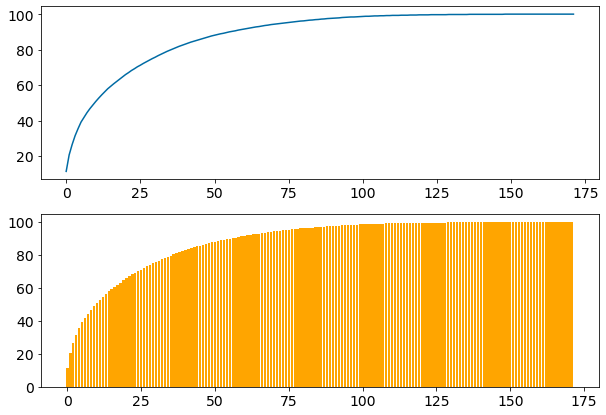

In [181]:
# draw the explained var cumusum
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=1)
plt.subplot(2,1,2)
plt.bar(range(len(cumulative_variance)), cumulative_variance, color='orange')
plt.subplot(2,1,1)
plt.plot(cumulative_variance)

<!-- # 55 data says 90% variance
73 data says 95% variance
117 data says 100% variance¶ -->

# 55 data says 90% variance
# 73 data says 95% variance
# 117 data says 100% variance¶

# Using 55 col -- > Logestic Regresion+PCA through pipeline

In [182]:
# as the data is not balanced we use balance in class_wight while creating logreg
components = 55
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=components)),
         ("logreg", LogisticRegression(class_weight='balanced')) 
        ]
pipeline = Pipeline(steps)

In [183]:
# fit model
pipeline.fit(x_train, y_train)

# check score on train data
pipeline.score(x_train, y_train)

0.8172

# Check - test data

In [184]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

#calculate auc
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
auc=np.round(roc_auc_score(Y_test, y_pred_prob),3)




#get confusion matrix
confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print("_____________________________")
print("-------------------------------->")
print(confusionmatrix)
print()
print("_____________________________")
print("-------------------------------->")

# get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred,average='binary' )
pd.DataFrame({"Sensitivity":[np.round(sensitivity,2)],
              "Specificity":[np.round(specificity,2)],
              "AUC": [auc]
    
})



Confusion Matrix
_____________________________
-------------------------------->
[[5611 1280]
 [ 105  505]]

_____________________________
-------------------------------->


Sensitivity  Specificity    AUC
0         0.83         0.81  0.896

# Hyperparameter tuning - PCA + Logistic Regression

In [185]:
# PCA
pca = PCA()

# logistic regression - wight 10% 0 and 90% 1 balnced data
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [55, 73, 40], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [186]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [55, 73, 40]},
             scoring='roc_auc', verbose=1)

In [187]:
#print the result
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.482582      1.366862         0.000000        0.000000   
1        1.945043      0.123291         0.000000        0.000000   
2        1.280851      0.030120         0.000000        0.000000   
3        2.151155      0.107016         0.096382        0.015214   
4        2.450789      0.057971         0.076177        0.010309   
5        1.641726      0.026547         0.060507        0.012516   
6        1.869237      0.236662         0.000000        0.000000   
7        2.305436      0.129963         0.000000        0.000000   
8        1.527638      0.126078         0.000000        0.000000   
9        2.221535      0.179690         0.094296        0.038826   
10       2.539301      0.099298         0.077344        0.020191   
11       1.820729      0.245030         0.095226        0.060113   
12       1.492578      0.371438         0.000000        0.000000   
13       2.154018      0.298740         0.000000        0.000000   
14       1.330051      0.096424         0.000000        0.000000   
15       2.109156      0.093907         0.077849        0.017381   
16       2.610340      0.154100         0.075705        0.005125   
17       1.550751      0.055298         0.076163        0.009406   
18       1.604448      0.092022         0.000000        0.000000   
19       2.363288      0.150297         0.000000        0.000000   
20       1.526799      0.175417         0.000000        0.000000   
21       2.072144      0.048733         0.067837        0.008855   
22       2.878414      0.294787         0.123893        0.026212   
23       1.876028      0.235430         0.098606        0.005872   
24       1.651216      0.390049         0.000000        0.000000   
25       2.500562      0.302034         0.000000        0.000000   
26       1.647688      0.306162         0.000000        0.000000   
27       2.606333      0.160666         0.080555        0.013590   
28       2.644818      0.232281         0.116077        0.027498   
29       1.747133      0.237313         0.076949        0.009015   
30       1.715386      0.188100         0.000000        0.000000   
31       2.534099      0.220313         0.000000        0.000000   
32       1.489048      0.287859         0.000000        0.000000   
33       2.106572      0.102520         0.075168        0.017124   
34       2.516384      0.184315         0.091965        0.009224   
35       1.542527      0.049626         0.076140        0.016529   
36       1.707288      0.153402         0.000000        0.000000   
37       2.366853      0.213245         0.000000        0.000000   
38       1.575550      0.154880         0.000000        0.000000   
39       2.217701      0.107411         0.070898        0.005094   
40       3.008008      0.187314         0.105726        0.029793   
41       1.881730      0.196699         0.095165        0.017148   
42       1.861406      0.369377         0.000000        0.000000   
43       2.475758      0.400980         0.000000        0.000000   
44       1.498480      0.265311         0.000000        0.000000   
45       2.499286      0.100219         0.086439        0.010858   
46       2.818142      0.173258         0.091148        0.041434   
47       1.832867      0.188392         0.060261        0.016030   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      55   
1                0.1                      l1                      73   
2                0.1                      l1                      40   
3                0.1                      l2                      55   
4                0.1                      l2                      73   
5                0.1                      l2                      40   
6                0.5                      l1                      55   
7                0.5                      l1                      73   
8                0.5   

In [188]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8984250781853543
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 73}


In [189]:
# predict churn on test data
y_pred = model.predict(X_test)

#calculate auc
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=np.round(roc_auc_score(Y_test, y_pred_prob),3)




#get confusion matrix
confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print("_____________________________")
print("-------------------------------->")
print(confusionmatrix)
print()
print("_____________________________")
print("-------------------------------->")

# get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred,average='binary' )
pd.DataFrame({"Sensitivity":[np.round(sensitivity,2)],
              "Specificity":[np.round(specificity,2)],
              "AUC": [auc]
    
})



Confusion Matrix
_____________________________
-------------------------------->
[[5834 1057]
 [ 112  498]]

_____________________________
-------------------------------->


Sensitivity  Specificity    AUC
0         0.82         0.85  0.902

In [190]:
# by using 73 components the true positive reduced and false neagtive increased but auc increased

# Random Forest

In [191]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [192]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [193]:
# predict churn on test data
y_pred = model.predict(X_test)

#calculate auc
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=np.round(roc_auc_score(Y_test, y_pred_prob),3)




#get confusion matrix
confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print("_____________________________")
print("-------------------------------->")
print(confusionmatrix)
print()
print("_____________________________")
print("-------------------------------->")

# get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred,average='binary' )
pd.DataFrame({"Sensitivity":[np.round(sensitivity,2)],
              "Specificity":[np.round(specificity,2)],
              "AUC": [auc]
    
})



Confusion Matrix
_____________________________
-------------------------------->
[[6799   92]
 [ 299  311]]

_____________________________
-------------------------------->


Sensitivity  Specificity    AUC
0         0.51         0.99  0.934

In [194]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6891
           1       0.77      0.51      0.61       610

    accuracy                           0.95      7501
   macro avg       0.86      0.75      0.79      7501
weighted avg       0.94      0.95      0.94      7501



In [195]:
# it has poor sensitivity so best is logestic regression with pca

# Choosing best features 

In [196]:
# run a random forest model on train data
max_features = int(round(np.sqrt(x_train.shape[1])))    
print(max_features) # max features to consider to get split each node

13


In [197]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [198]:
rf_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.2s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [199]:
# OOB score
rf_model.oob_score_

0.9431111111111111

In [200]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

#calculate auc
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
auc=np.round(roc_auc_score(Y_test, y_pred_prob),3)




#get confusion matrix
confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print("_____________________________")
print("-------------------------------->")
print(confusionmatrix)
print()
print("_____________________________")
print("-------------------------------->")

# get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred,average='binary' )
pd.DataFrame({"Sensitivity":[np.round(sensitivity,2)],
              "Specificity":[np.round(specificity,2)],
              "AUC": [auc]
    
})


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion Matrix
_____________________________
-------------------------------->
[[6802   89]
 [ 321  289]]

_____________________________
-------------------------------->


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Sensitivity  Specificity    AUC
0         0.47         0.99  0.934

# Feature Importance

In [201]:
# predictors
features = churn_filter.drop('churn_flag', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0           total_ic_mou_8               5.780778
1         loc_ic_t2m_mou_8               4.755958
2             loc_ic_mou_8               4.553992
3           total_og_mou_8               2.997081
4             loc_og_mou_8               2.760400
5       last_day_rch_amt_8               2.733361
6      total_rech_amt_diff               2.564391
7                arpu_diff               2.252824
8         loc_og_t2t_mou_8               2.045491
9         loc_og_t2m_mou_8               1.996285
10                  arpu_8               1.993459
11        loc_ic_t2t_mou_8               1.984414
12       total_ic_mou_diff               1.871720
13           roam_og_mou_8               1.833415
14          max_rech_amt_8               1.591203
15      av_rech_amt_data_8               1.559509
16     total_rech_num_diff               1.397799
17        total_rech_amt_8               1.382087
18            std_ic_mou_8               1.357303
19        roam_og_mou_diff               1.295359
20       total_og_mou_diff               1.290815
21         std_og_mou_diff               1.203456
22         max_rech_data_8               1.196853
23        roam_ic_mou_diff               1.180867
24            offnet_mou_8               1.131511
25         loc_ic_mou_diff               1.095438
26           roam_ic_mou_8               1.092755
27         offnet_mou_diff               1.077244
28       max_rech_amt_diff               0.892435
29        loc_ic_t2f_mou_8               0.777161
30             vol_2g_mb_8               0.758031
31        loc_og_t2f_mou_8               0.721341
32        night_pck_user_8               0.715745
33            loc_ic_mou_7               0.650008
34                     aon               0.647884
35         std_ic_mou_diff               0.640498
36          onnet_mou_diff               0.638619
37         loc_og_mou_diff               0.629963
38               fb_user_8               0.605420
39          total_ic_mou_7               0.574377
40             onnet_mou_8               0.566965
41          vol_2g_mb_diff               0.558815
42        loc_ic_t2m_mou_6               0.556383
43                  arpu_6               0.539582
44        total_rech_amt_7               0.531094
45                  arpu_7               0.524632
46      max_rech_data_diff               0.514620
47         spl_og_mou_diff               0.502147
48        total_rech_num_7               0.488898
49            loc_ic_mou_6               0.479111
50   av_rech_amt_data_diff               0.474190
51          total_og_mou_7               0.466526
52        total_rech_amt_6               0.466336
53       total_rech_data_8               0.463296
54        loc_ic_t2t_mou_6               0.463194
55        loc_og_t2m_mou_7               0.459094
56            offnet_mou_7               0.447808
57             vol_3g_mb_8               0.446531
58            offnet_mou_6               0.445124
59        total_rech_num_8               0.441514
60          total_ic_mou_6               0.439451
61        loc_ic_t2m_mou_7               0.437684
62        loc_ic_t2t_mou_7               0.434171
63            std_og_mou_7               0.433219
64        loc_og_t2m_mou_6               0.432269
65        loc_og_t2t_mou_6               0.427735
66          max_rech_amt_6               0.425204
67            loc_og_mou_7               0.417371
68            loc_og_mou_6               0.414435
69        loc_og_t2t_mou_7               0.406501
70        std_ic_t2m_mou_8               0.404902
71        std_og_t2m_mou_8               0.399513
72             onnet_mou_6               0.398156
73        total_rech_num_6               0.394286
74           roam_og_mou_7               0.386821
75          total_og_mou_6               0.383759
76            std_og_mou_6               0.380131
77            std_ic_mou_7               0.379777
78          max_rech_amt_7               0.379137
79             on

# Extracting top 30 features

In [202]:
# to make the model lighter extract out 30 top features
top_30 = feature_importance.variables[0:30]
top_30

0          total_ic_mou_8
1        loc_ic_t2m_mou_8
2            loc_ic_mou_8
3          total_og_mou_8
4            loc_og_mou_8
5      last_day_rch_amt_8
6     total_rech_amt_diff
7               arpu_diff
8        loc_og_t2t_mou_8
9        loc_og_t2m_mou_8
10                 arpu_8
11       loc_ic_t2t_mou_8
12      total_ic_mou_diff
13          roam_og_mou_8
14         max_rech_amt_8
15     av_rech_amt_data_8
16    total_rech_num_diff
17       total_rech_amt_8
18           std_ic_mou_8
19       roam_og_mou_diff
20      total_og_mou_diff
21        std_og_mou_diff
22        max_rech_data_8
23       roam_ic_mou_diff
24           offnet_mou_8
25        loc_ic_mou_diff
26          roam_ic_mou_8
27        offnet_mou_diff
28      max_rech_amt_diff
29       loc_ic_t2f_mou_8
Name: variables, dtype: object

In [203]:
#check the data with top 30
x_train[top_30]

total_ic_mou_8  loc_ic_t2m_mou_8  loc_ic_mou_8  total_og_mou_8  \
16702          774.73        509.380000        659.54         1205.98   
6059             0.00          0.000000          0.00            0.00   
21338           92.93         82.330000         92.73          342.46   
29003          180.74         38.340000         43.16          210.26   
2668           283.53        174.280000        270.11          648.63   
...               ...               ...           ...             ...   
25649          438.51        355.630000        431.68          466.09   
5053           500.39        219.010000        496.56          260.53   
29663           73.13         42.980000         54.69          155.91   
6947          1224.13        790.880604       1034.93         1560.51   
20220          480.26        409.510000        480.26          189.54   

       loc_og_mou_8  last_day_rch_amt_8  total_rech_amt_diff  arpu_diff  \
16702       1089.51          350.000000                -81.5   -46.9815   
6059           0.00          527.940627               -236.5  -199.5145   
21338        341.76          154.000000               -168.0  -246.4640   
29003        133.53            0.000000               -500.0   416.2630   
2668         585.09          200.000000                -91.5    23.1475   
...             ...                 ...                  ...        ...   
25649        429.71          150.000000                195.5   119.5615   
5053         259.44            7.000000               -410.5  -175.8390   
29663        122.93          154.000000               -550.5  -270.0325   
6947         891.36          130.000000                465.0   277.8515   
20220        169.63           20.000000               -135.0  -112.2820   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8    arpu_8  loc_ic_t2t_mou_8  \
16702            449.83            586.79  1272.953            115.48   
6059               0.00              0.00   809.382              0.00   
21338              2.76            335.33   433.989              0.00   
29003              1.56             52.81   454.340              0.00   
2668             108.64            474.24  1034.869             88.49   
...                 ...               ...       ...               ...   
25649             72.61            356.34   550.100             74.59   
5053              71.96            185.11   293.779            248.49   
29663              2.99            116.53   475.736             11.71   
6947             216.48            672.76  1003.330            204.01   
20220             40.86            128.76   272.393             32.46   

       total_ic_mou_diff  roam_og_mou_8  max_rech_amt_8  av_rech_amt_data_8  \
16702           -101.665           0.00       400.00000          252.000000   
6059               0.000           0.00       679.76786          708.893089   
21338            -78.615           0.00       154.00000          154.000000   
29003            115.685          11.38         0.00000            0.000000   
2668              76.230          97.48       200.00000            0.000000   
...                  ...            ...             ...                 ...   
25649             70.575           0.00       215.00000          179.000000   
5053               9.915           0.00       154.00000          154.000000   
29663           -136.945           0.00       154.00000          308.000000   
6947             471.570           0.00       198.00000          359.000000   
20220            119.565           0.00        50.00000            0.000000   

       total_rech_num_diff  total_rech_amt_8  std_ic_mou_8  roam_og_mou_diff  \
16702                 -1.5            1400.0        111.49             0.000   
6059                  -1.0             951.0          0.00             0.000   
21338                 -6.0             584.0          0.00             0.000   
29003                  1.0               0.0          1.66            11.380   
266

<AxesSubplot:>

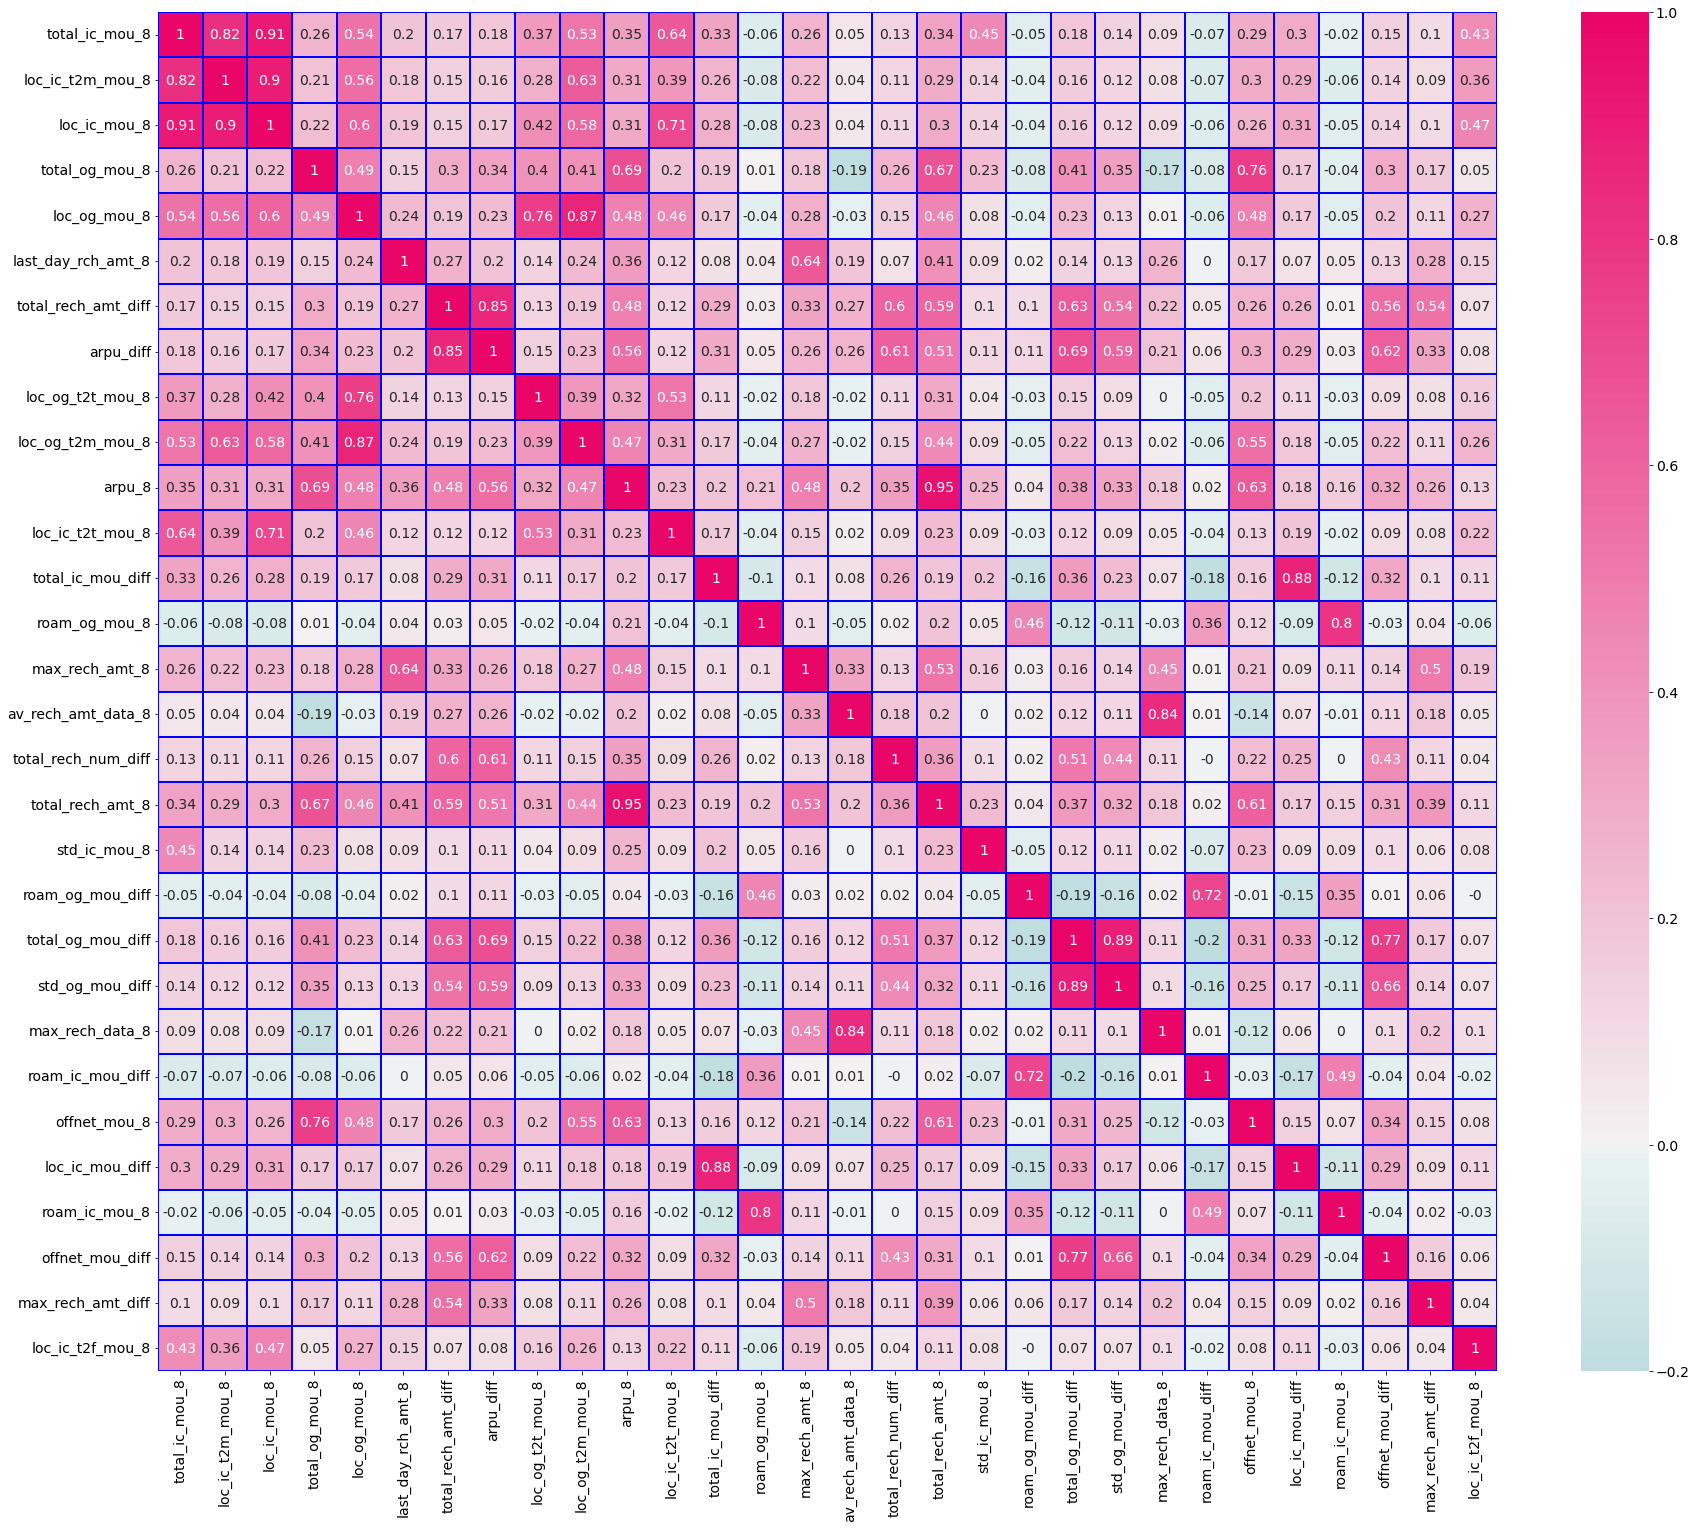

In [204]:
# make hitmap to find out the correlation b/w features 
plt.figure(figsize=[30,25])
cmap_x = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=np.round(x_train[top_30].corr(),2),fmt=".2g", center=0.0, cmap=cmap_x, annot=True, linecolor="blue", linewidths=.25)


In [205]:
col_good = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8',"arpu_8"]
xx_train = x_train[col_good]
xx_test = X_test[col_good]

In [206]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [207]:
# fit model
model.fit(xx_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [208]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8721499188359887
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [209]:
# predict churn on test data
y_pred = model.predict(xx_test)

#calculate auc
y_pred_prob = model.predict_proba(xx_test)[:, 1]
auc=np.round(roc_auc_score(Y_test, y_pred_prob),3)




#get confusion matrix
confusionmatrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print("_____________________________")
print("-------------------------------->")
print(confusionmatrix)
print()
print("_____________________________")
print("-------------------------------->")

# get sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test, y_pred,average='binary' )
pd.DataFrame({"Sensitivity":[np.round(sensitivity,3)],
              "Specificity":[np.round(specificity,3)],
              "AUC": [auc]
    
})


Confusion Matrix
_____________________________
-------------------------------->
[[5735 1156]
 [ 120  490]]

_____________________________
-------------------------------->


Sensitivity  Specificity    AUC
0        0.803        0.832  0.886

# Extract the intercept and the coefficients 

In [210]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [211]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [212]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(xx_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [213]:
df_final = pd.concat([intercept_df, coefficients_df], axis=1)
df_final.iloc[:,1:]

total_ic_mou_8  total_rech_amt_diff  total_og_mou_8  roam_ic_mou_8  \
0        -1.23694            -0.682025       -1.345566       0.002563   

   roam_og_mou_8  std_ic_mou_8  av_rech_amt_data_8  std_og_mou_8    arpu_8  
0        0.17233      0.116209           -0.811135      0.741814  0.288065

# Insights:

- Company should give roaming offers/packages to customer who are using service in roaming.

- Company Should give some offers for packages ISD and STD calls. 

- Company should give some offer for them who does high value recharge

- Company should look into the customer's feed back carefully and note down the same. 

- Average revenue per user seems to be most important feature in determining churn prediction.

- Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

- Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.